In [180]:
import pandas as pd

from tensorflow import keras
from keras import layers

from src.utils import(
    GloveModel, 
    read_data, 
    train_model,
    print_testing_loss_accuracy, 
    calculate_average_measures, 
)

from src.preprocessing import Preprocessor
from src.plotting import PlottingManager

In [24]:
preprocessor = Preprocessor()
plotter = PlottingManager()
glove_model = GloveModel()

In [181]:
X_train, X_test, y_train, y_test = read_data()

In [26]:
def build_glove_model():
    """
    Build and compile a GloVe based model.

    Returns:
    --------
    - model : keras.models.Sequential
        A compiled model that will be trained later.
    """
    
    global embedding_layer
    model = keras.models.Sequential([
        embedding_layer,
        layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Bidirectional(layers.LSTM(16, return_sequences=True)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Bidirectional(layers.LSTM(8)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(50, activation='tanh'),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [27]:
glove_tokenizer_1, X_train_vectors_1 = preprocessor.convert_text_to_vectors_glove(X_train["Facts"])

In [28]:
X_test_vectors_1 = preprocessor.convert_text_to_vectors_glove(X_test["Facts"], train=False, glove_tokenizer=glove_tokenizer_1)

In [29]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_1)

In [30]:
all_models_1, all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1 = train_model(build_glove_model, X_train_vectors_1, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 15s 125ms/step - loss: 0.7090 - accuracy: 0.5301 - val_loss: 0.6774 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 2s 56ms/step - loss: 0.6447 - accuracy: 0.6397 - val_loss: 0.6748 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 2s 56ms/step - loss: 0.6083 - accuracy: 0.6729 - val_loss: 0.6651 - val_accuracy: 0.5838
Epoch 4/30
33/33 [==============================] - 2s 56ms/step - loss: 0.5785 - accuracy: 0.6917 - val_loss: 0.6612 - val_accuracy: 0.5910
Epoch 5/30
33/33 [==============================] - 2s 56ms/step - loss: 0.5345 - accuracy: 0.7263 - val_loss: 0.6433 - val_accuracy: 0.6098
Epoch 6/30
33/33 [==============================] - 2s 57ms/step - loss: 0.4903 - accuracy: 0.7677 - val_loss: 0.7363 - val_accuracy: 0.5925
Epoch 7/30
33/33 [==============================] - 2s 56ms/step - loss: 0.4168 - accuracy: 0.8081 - val_loss: 0.6196 - val_accuracy: 0.6676
Epo

In [31]:
avg_loss_hist_1, avg_val_loss_hist_1, avg_acc_hist_1, avg_val_acc_hist_1 = calculate_average_measures(all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1)

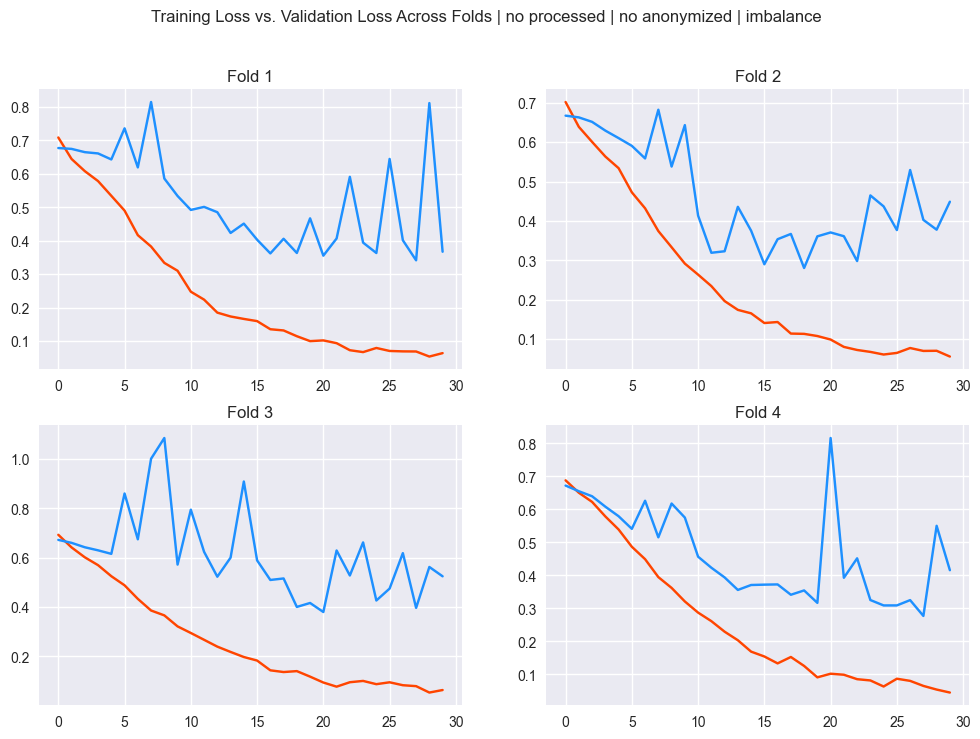

In [32]:
plotter.plot_subplots_curve(all_losses_1, all_val_losses_1, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | imbalance ")

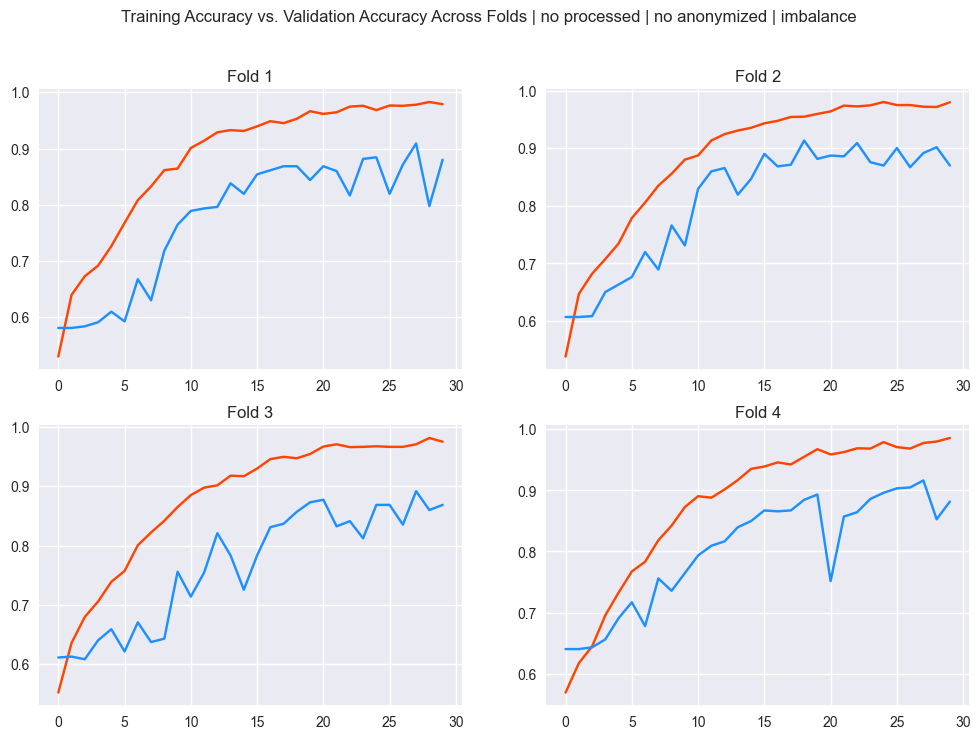

In [33]:
plotter.plot_subplots_curve(all_accuracies_1, all_val_accuracies_1, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | imbalance")

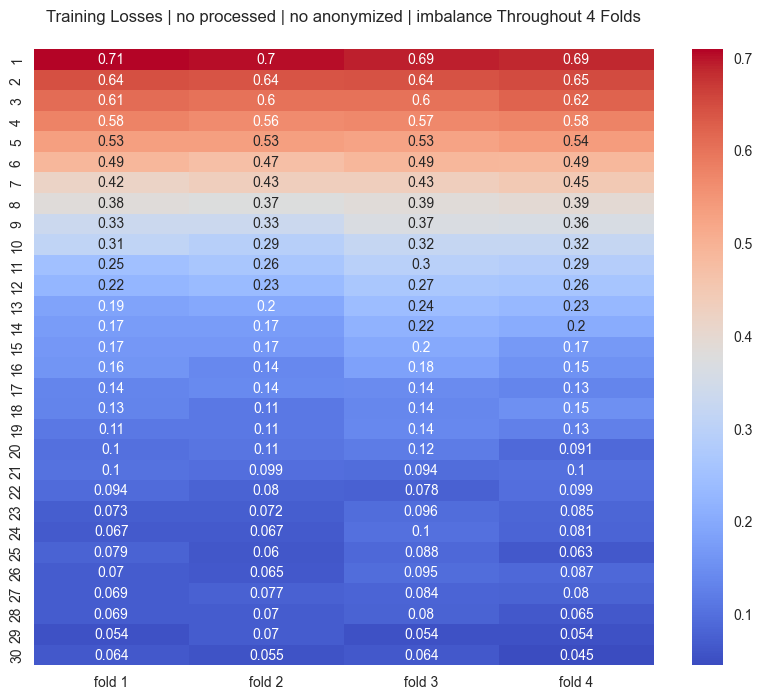

In [34]:
plotter.plot_heatmap(all_losses_1, "Training Losses | no processed | no anonymized | imbalance")

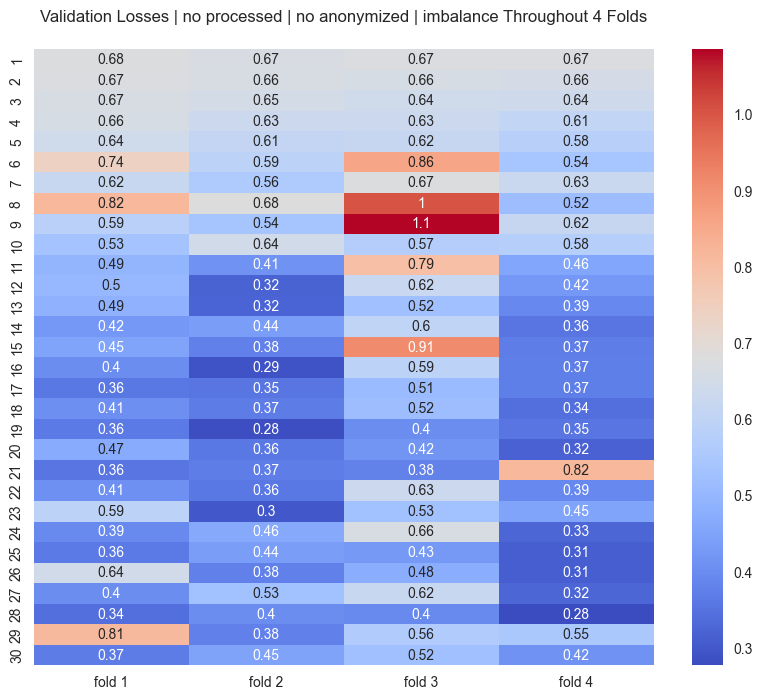

In [35]:
plotter.plot_heatmap(all_val_losses_1, "Validation Losses | no processed | no anonymized | imbalance")

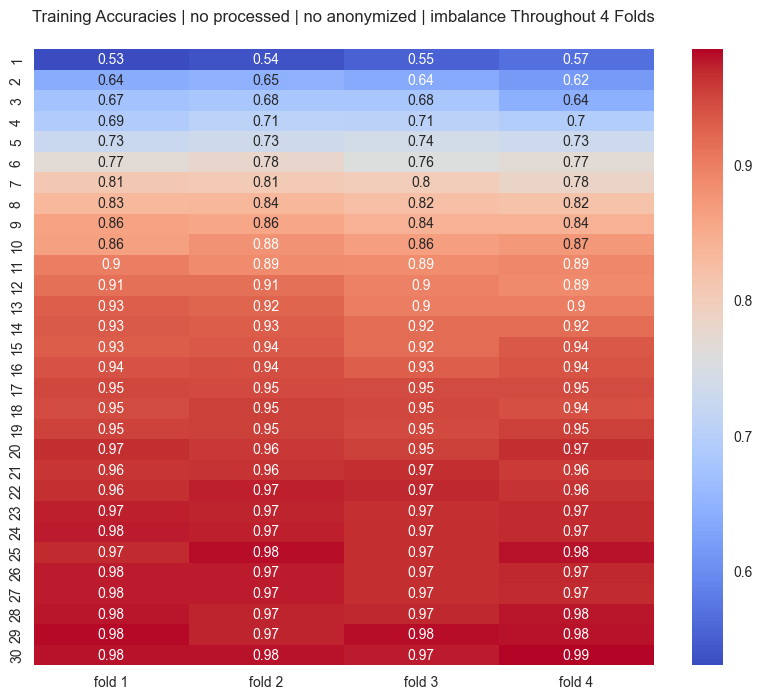

In [36]:
plotter.plot_heatmap(all_accuracies_1, "Training Accuracies | no processed | no anonymized | imbalance")

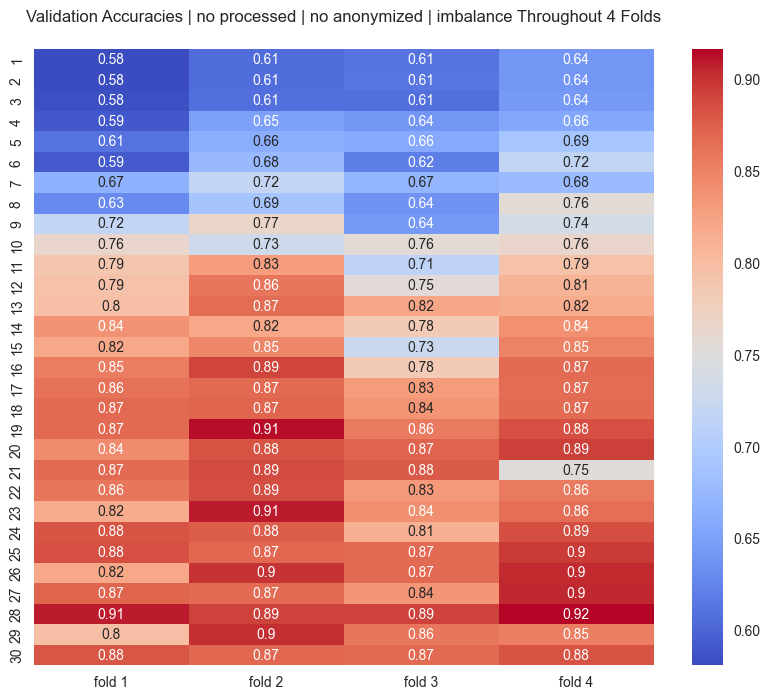

In [37]:
plotter.plot_heatmap(all_val_accuracies_1, "Validation Accuracies | no processed | no anonymized | imbalance")

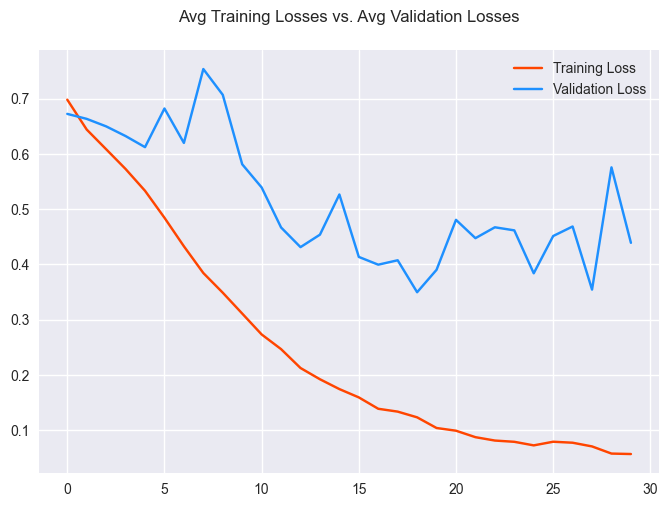

In [38]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_1, avg_val_loss_hist_1, "Training Loss", "Validation Loss")

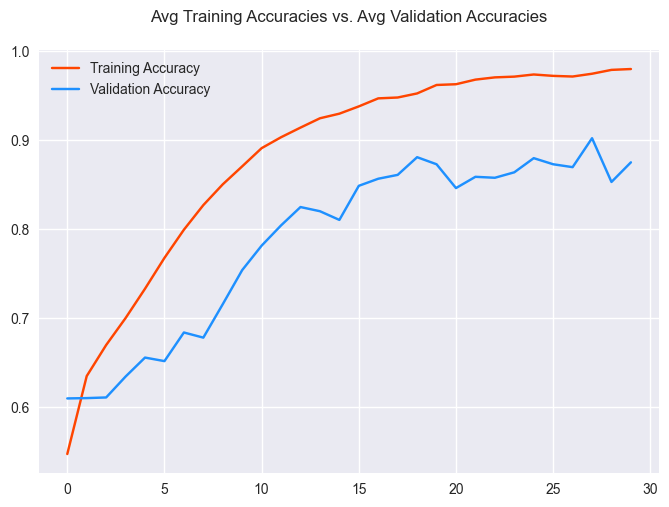

In [39]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_1, avg_val_acc_hist_1, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 5s 19ms/step


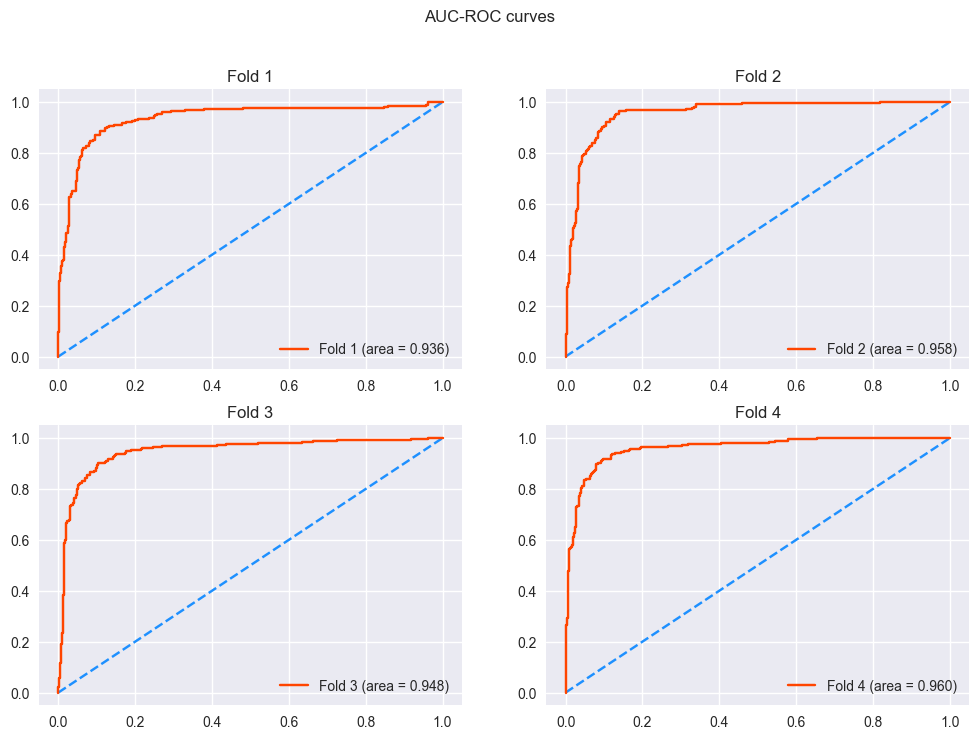

In [40]:
plotter.plot_roc_curve(all_models_1, X_test_vectors_1, y_test)

22/22 [==============================] - 0s 18ms/step


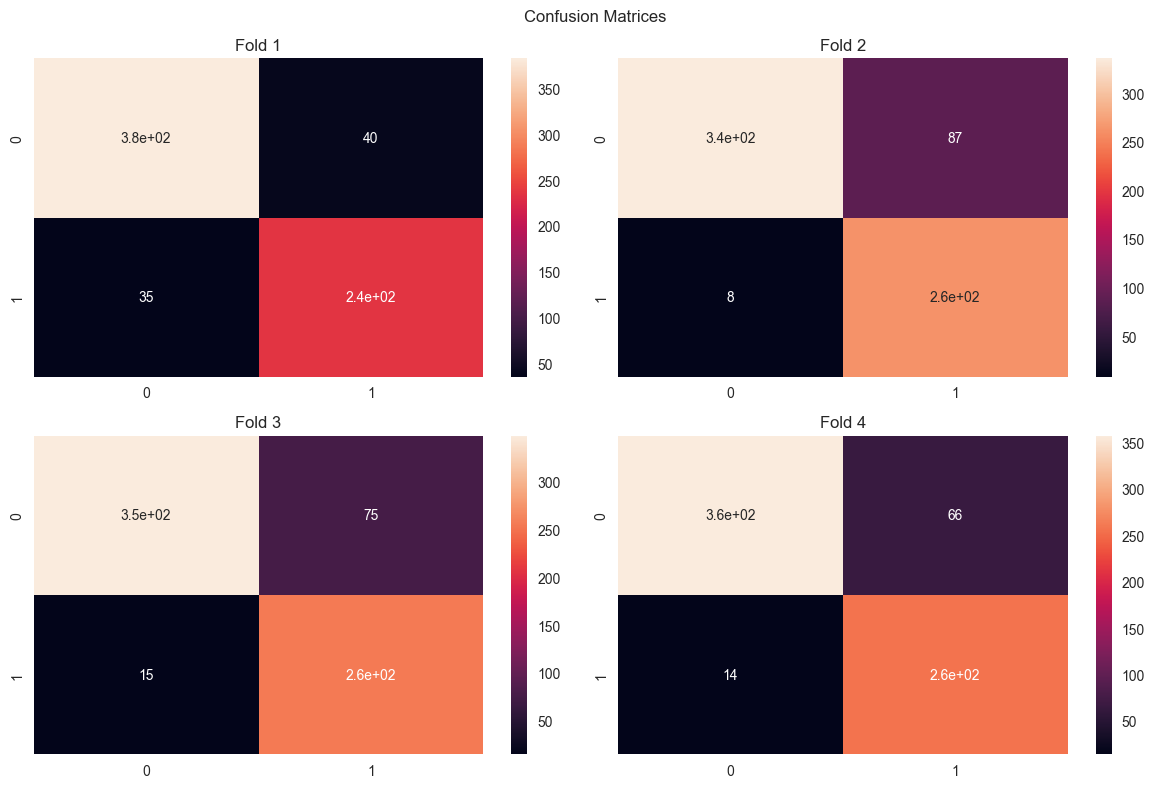

In [41]:
plotter.plot_confusion_matrix(all_models_1, X_test_vectors_1, y_test)

In [42]:
for i, trained_model in enumerate(all_models_1):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_1, y_test))

Model 1:
22/22 [==============================] - 1s 23ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       423
           1       0.85      0.87      0.86       270

    accuracy                           0.89       693
   macro avg       0.89      0.89      0.89       693
weighted avg       0.89      0.89      0.89       693

Model 2:
22/22 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       423
           1       0.75      0.97      0.85       270

    accuracy                           0.86       693
   macro avg       0.86      0.88      0.86       693
weighted avg       0.89      0.86      0.86       693

Model 3:
22/22 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       423
           1       0.77      0.94      0.85     

In [43]:
print_testing_loss_accuracy(all_models_1, X_test_vectors_1, y_test)

model: 1
22/22 [==============================] - 0s 21ms/step - loss: 0.4224 - accuracy: 0.8918
model: 2
22/22 [==============================] - 0s 21ms/step - loss: 0.4776 - accuracy: 0.8629
model: 3
22/22 [==============================] - 0s 19ms/step - loss: 0.4416 - accuracy: 0.8701
model: 4
22/22 [==============================] - 0s 17ms/step - loss: 0.3996 - accuracy: 0.8846
average testing loss: 0.435
average testing accuracy: 0.877


### Combination 2: (No Processing - No Anonymization - Balancing)


In [44]:
balanced_df = preprocessor.balance_data(X_train["Facts"], y_train)
X_train_balanced = balanced_df["Facts"]
y_train_balanced = balanced_df["winner_index"]

In [45]:
glove_tokenizer_2, X_train_vectors_2 = preprocessor.convert_text_to_vectors_glove(X_train_balanced)

In [46]:
X_test_vectors_2 = preprocessor.convert_text_to_vectors_glove(X_test["Facts"], train=False, glove_tokenizer=glove_tokenizer_2)

In [47]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_2)

In [48]:
all_models_2, all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2 = train_model(build_glove_model, X_train_vectors_2, y_train_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 18s 143ms/step - loss: 0.6857 - accuracy: 0.5562 - val_loss: 0.6909 - val_accuracy: 0.5030
Epoch 2/30
40/40 [==============================] - 3s 78ms/step - loss: 0.6359 - accuracy: 0.6354 - val_loss: 0.6839 - val_accuracy: 0.5183
Epoch 3/30
40/40 [==============================] - 3s 77ms/step - loss: 0.5809 - accuracy: 0.6866 - val_loss: 0.6334 - val_accuracy: 0.6769
Epoch 4/30
40/40 [==============================] - 3s 77ms/step - loss: 0.5349 - accuracy: 0.7288 - val_loss: 0.5738 - val_accuracy: 0.7136
Epoch 5/30
40/40 [==============================] - 3s 73ms/step - loss: 0.4669 - accuracy: 0.7753 - val_loss: 0.5319 - val_accuracy: 0.7183
Epoch 6/30
40/40 [==============================] - 3s 73ms/step - loss: 0.3969 - accuracy: 0.8226 - val_loss: 0.4872 - val_accuracy: 0.7479
Epoch 7/30
40/40 [==============================] - 3s 71ms/step - loss: 0.3481 - accuracy: 0.8530 - val_loss: 0.6813 - val_accuracy: 0.6615
Epo

In [49]:
avg_loss_hist_2, avg_val_loss_hist_2, avg_acc_hist_2, avg_val_acc_hist_2 = calculate_average_measures(all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2)

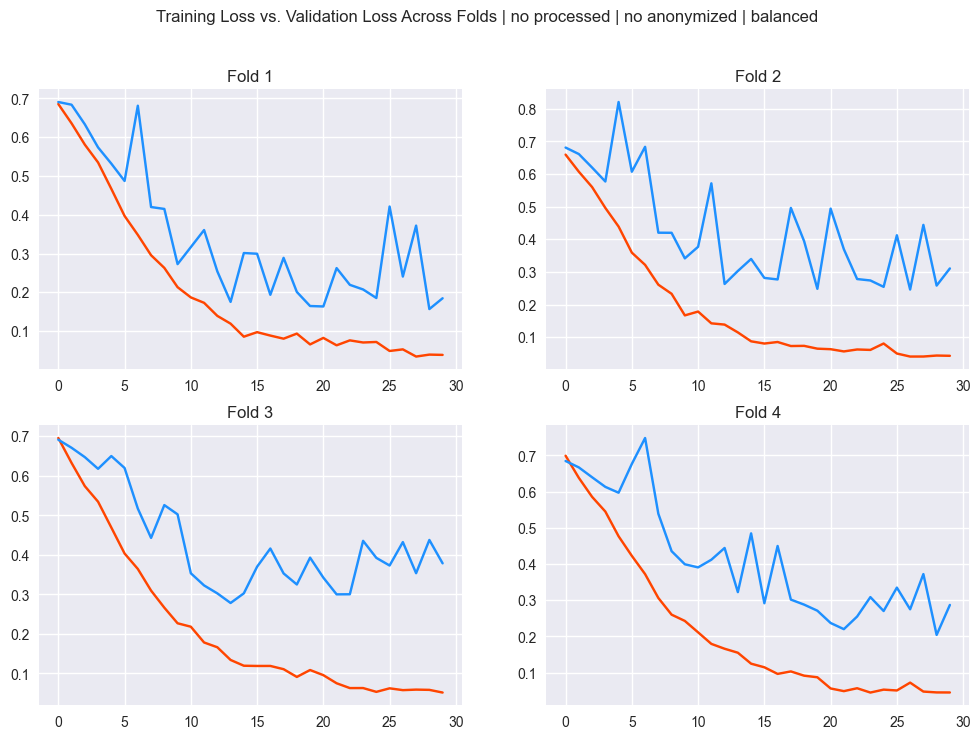

In [50]:
plotter.plot_subplots_curve(all_losses_2, all_val_losses_2, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | balanced ")

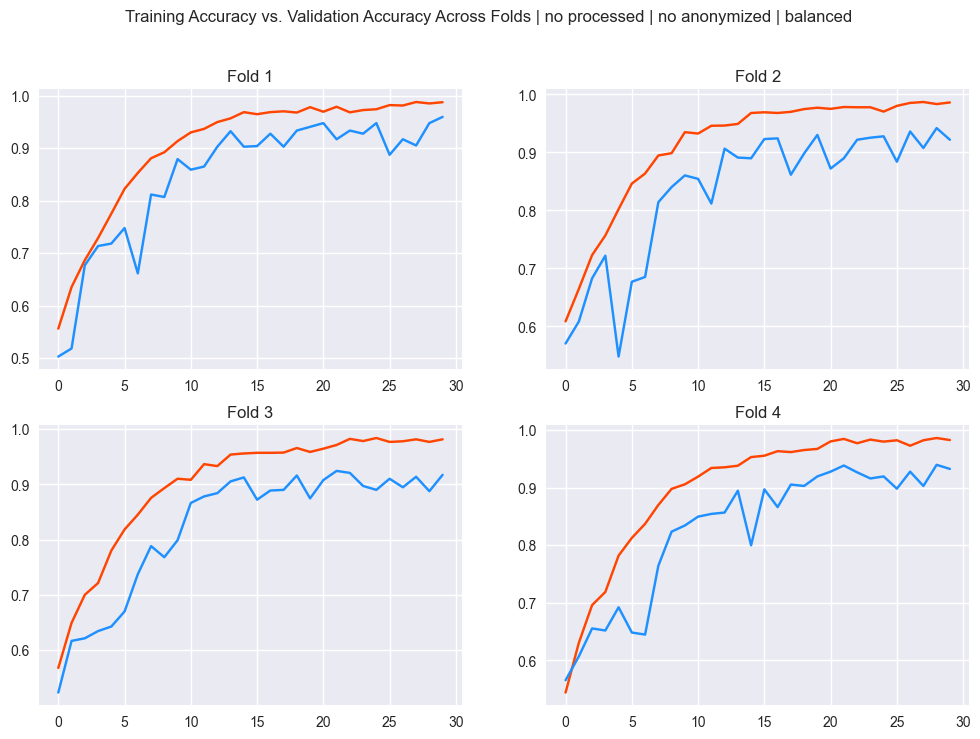

In [51]:
plotter.plot_subplots_curve(all_accuracies_2, all_val_accuracies_2, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | balanced")

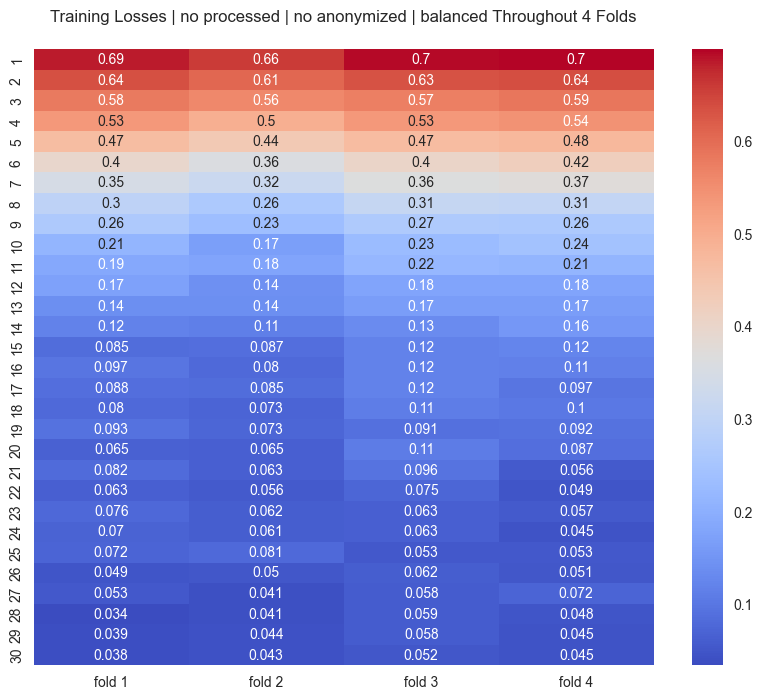

In [52]:
plotter.plot_heatmap(all_losses_2, "Training Losses | no processed | no anonymized | balanced")

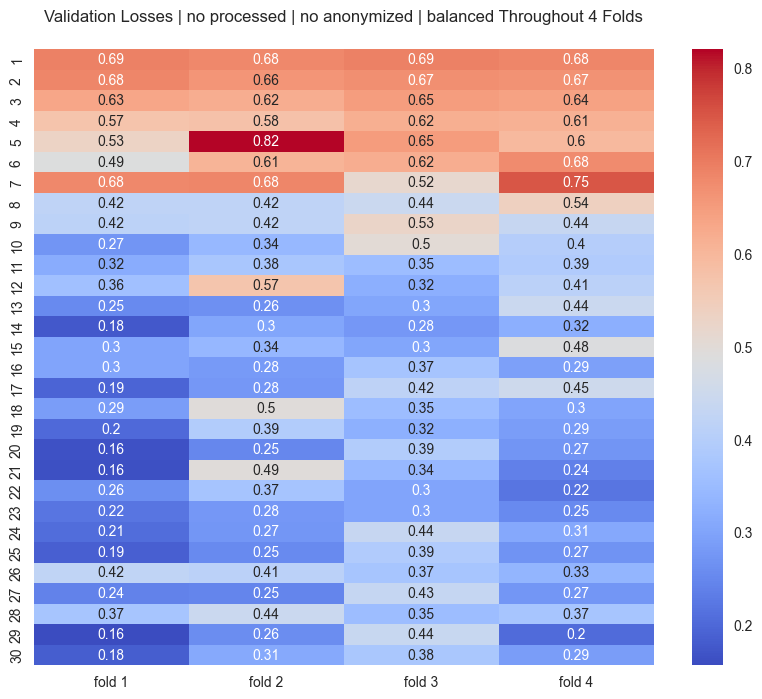

In [53]:
plotter.plot_heatmap(all_val_losses_2, "Validation Losses | no processed | no anonymized | balanced")

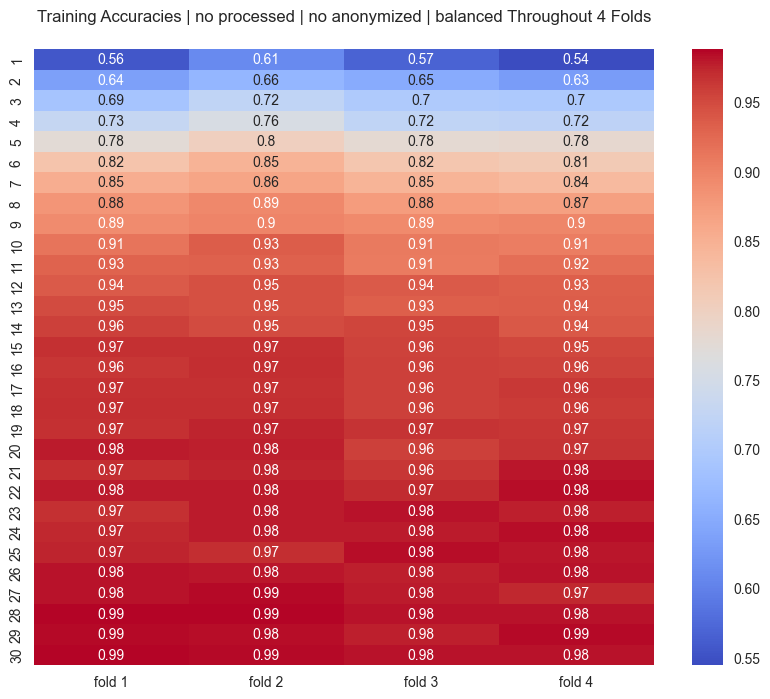

In [54]:
plotter.plot_heatmap(all_accuracies_2, "Training Accuracies | no processed | no anonymized | balanced")

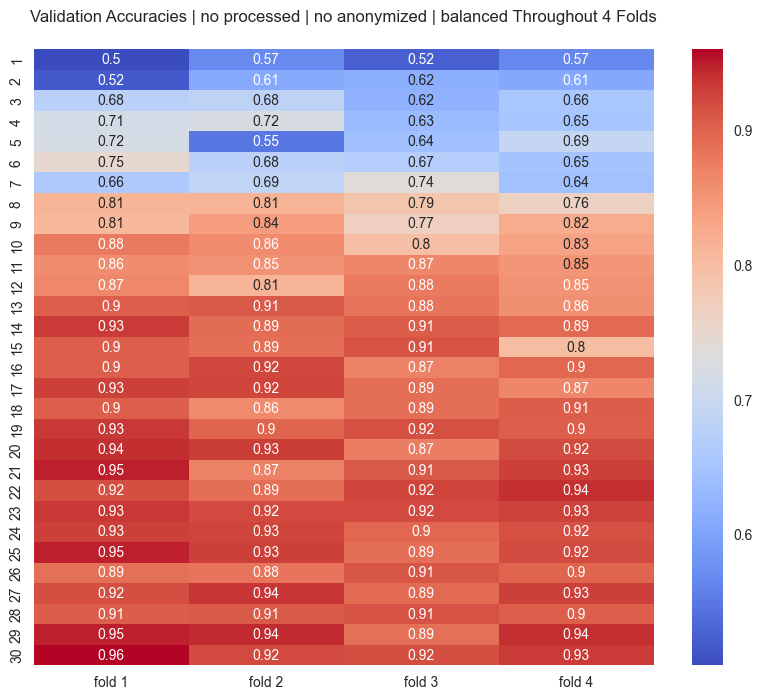

In [55]:
plotter.plot_heatmap(all_val_accuracies_2, "Validation Accuracies | no processed | no anonymized | balanced")

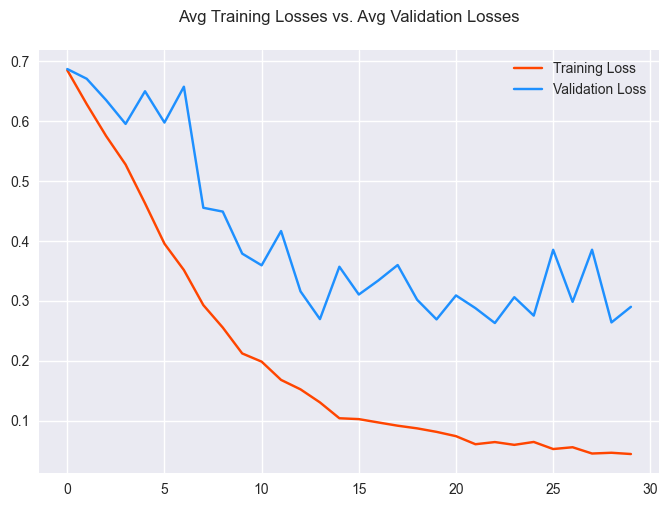

In [56]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_2, avg_val_loss_hist_2, "Training Loss", "Validation Loss")

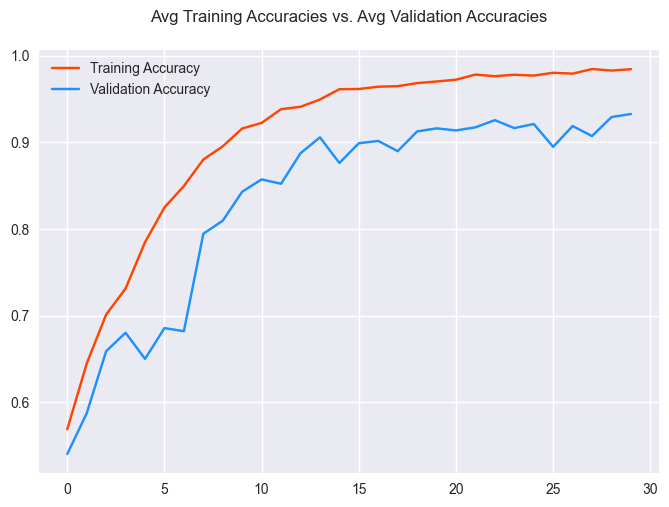

In [57]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_2, avg_val_acc_hist_2, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 3s 25ms/step


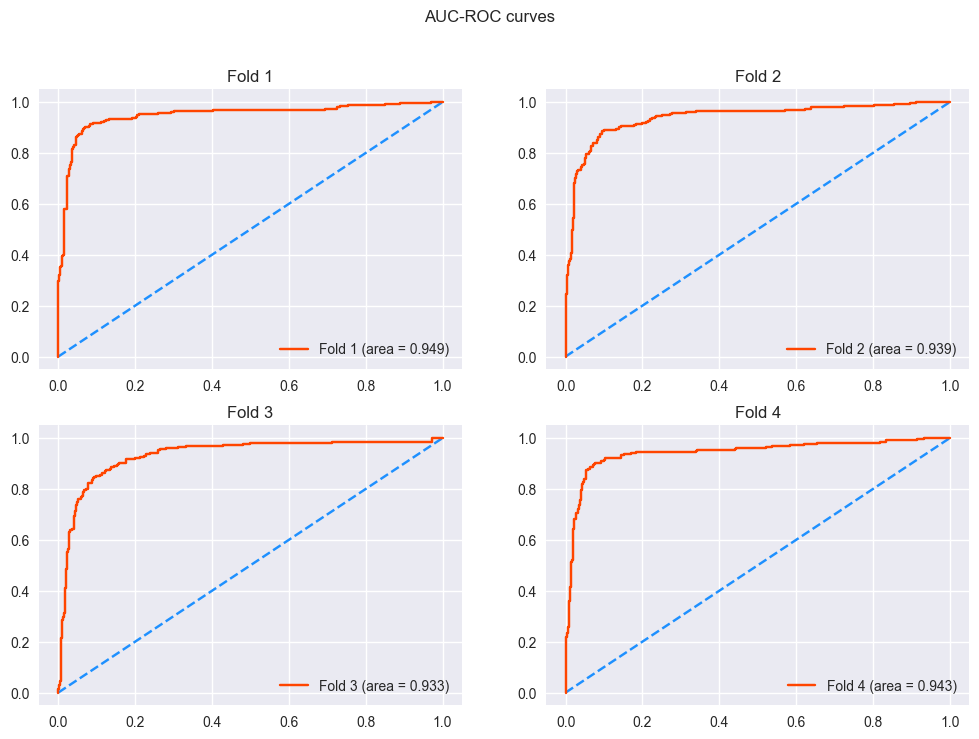

In [58]:
plotter.plot_roc_curve(all_models_2, X_test_vectors_2, y_test)

22/22 [==============================] - 1s 26ms/step


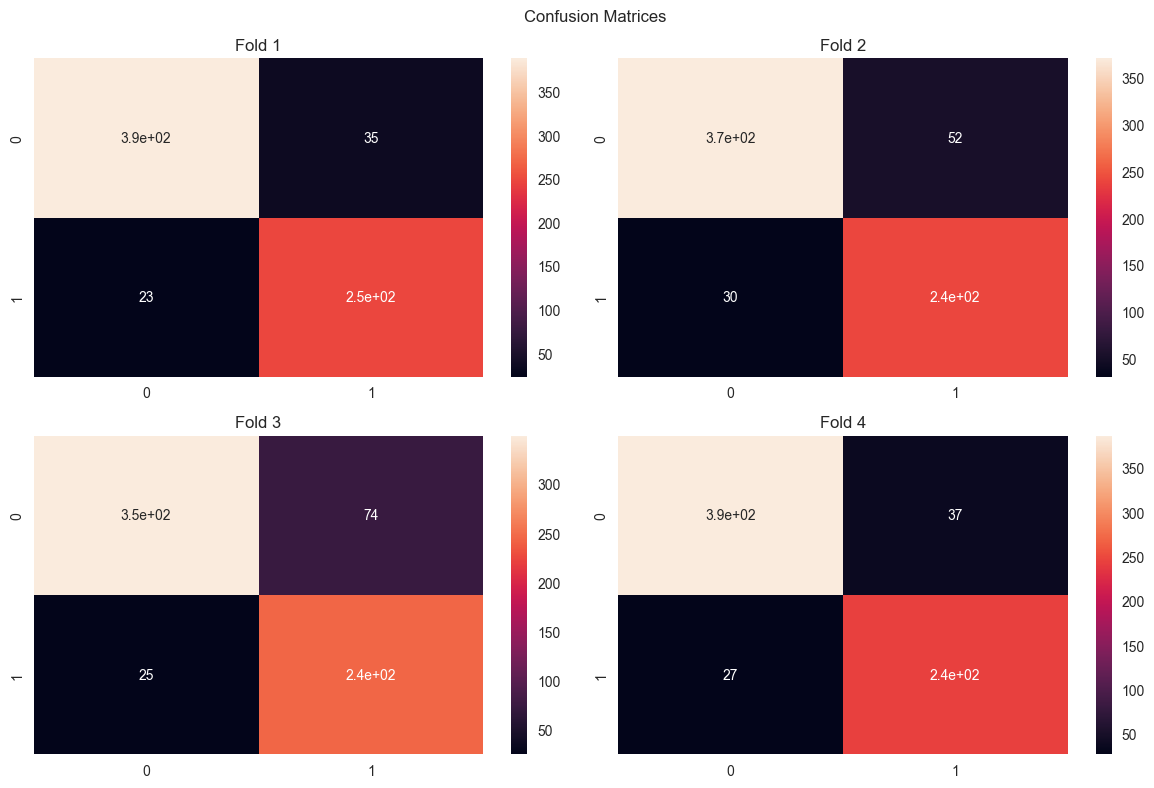

In [59]:
plotter.plot_confusion_matrix(all_models_2, X_test_vectors_2, y_test)

In [60]:
for i, trained_model in enumerate(all_models_2):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_2, y_test))

Model 1:
22/22 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.88      0.91      0.89       270

    accuracy                           0.92       693
   macro avg       0.91      0.92      0.91       693
weighted avg       0.92      0.92      0.92       693

Model 2:
22/22 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       423
           1       0.82      0.89      0.85       270

    accuracy                           0.88       693
   macro avg       0.87      0.88      0.88       693
weighted avg       0.88      0.88      0.88       693

Model 3:
22/22 [==============================] - 1s 24ms/step
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       423
           1       0.77      0.91      0.83     

In [61]:
print_testing_loss_accuracy(all_models_2, X_test_vectors_2, y_test)

model: 1
22/22 [==============================] - 1s 25ms/step - loss: 0.3848 - accuracy: 0.9163
model: 2
22/22 [==============================] - 1s 26ms/step - loss: 0.4697 - accuracy: 0.8817
model: 3
22/22 [==============================] - 1s 26ms/step - loss: 0.5670 - accuracy: 0.8571
model: 4
22/22 [==============================] - 1s 27ms/step - loss: 0.4145 - accuracy: 0.9076
average testing loss: 0.459
average testing accuracy: 0.891


### Combination 3: (No Processing - Anonymization - Imbalancing)


In [62]:
first_party_names_3 = X_train["first_party"]
second_party_names_3 = X_train["second_party"]
facts_3 = X_train["Facts"]

In [63]:
test_first_party_names_3 = X_test["first_party"]
test_second_party_names_3 = X_test["second_party"]
test_facts_3 = X_test["Facts"]

In [64]:
anonymized_facts_3 = preprocessor.anonymize_data(first_party_names_3, second_party_names_3, facts_3)
test_anonymized_facts_3 = preprocessor.anonymize_data(test_first_party_names_3, test_second_party_names_3, test_facts_3)

In [65]:
glove_tokenizer_3, X_train_vectors_3 = preprocessor.convert_text_to_vectors_glove(anonymized_facts_3)

In [66]:
X_test_vectors_3 = preprocessor.convert_text_to_vectors_glove(test_anonymized_facts_3, train=False, glove_tokenizer=glove_tokenizer_3)

In [67]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_3)

In [68]:
all_models_3, all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3 = train_model(build_glove_model, X_train_vectors_3, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 18s 196ms/step - loss: 0.6914 - accuracy: 0.5637 - val_loss: 0.6762 - val_accuracy: 0.5838
Epoch 2/30
33/33 [==============================] - 4s 118ms/step - loss: 0.6255 - accuracy: 0.6580 - val_loss: 0.6634 - val_accuracy: 0.5838
Epoch 3/30
33/33 [==============================] - 4s 114ms/step - loss: 0.5909 - accuracy: 0.6917 - val_loss: 0.6489 - val_accuracy: 0.5968
Epoch 4/30
33/33 [==============================] - 4s 115ms/step - loss: 0.5500 - accuracy: 0.7210 - val_loss: 0.6264 - val_accuracy: 0.6402
Epoch 5/30
33/33 [==============================] - 4s 115ms/step - loss: 0.4957 - accuracy: 0.7624 - val_loss: 0.5957 - val_accuracy: 0.6691
Epoch 6/30
33/33 [==============================] - 4s 115ms/step - loss: 0.4702 - accuracy: 0.7860 - val_loss: 0.6377 - val_accuracy: 0.6662
Epoch 7/30
33/33 [==============================] - 4s 117ms/step - loss: 0.4155 - accuracy: 0.8052 - val_loss: 0.7102 - val_accuracy: 0.64

In [69]:
avg_loss_hist_3, avg_val_loss_hist_3, avg_acc_hist_3, avg_val_acc_hist_3 = calculate_average_measures(all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3)

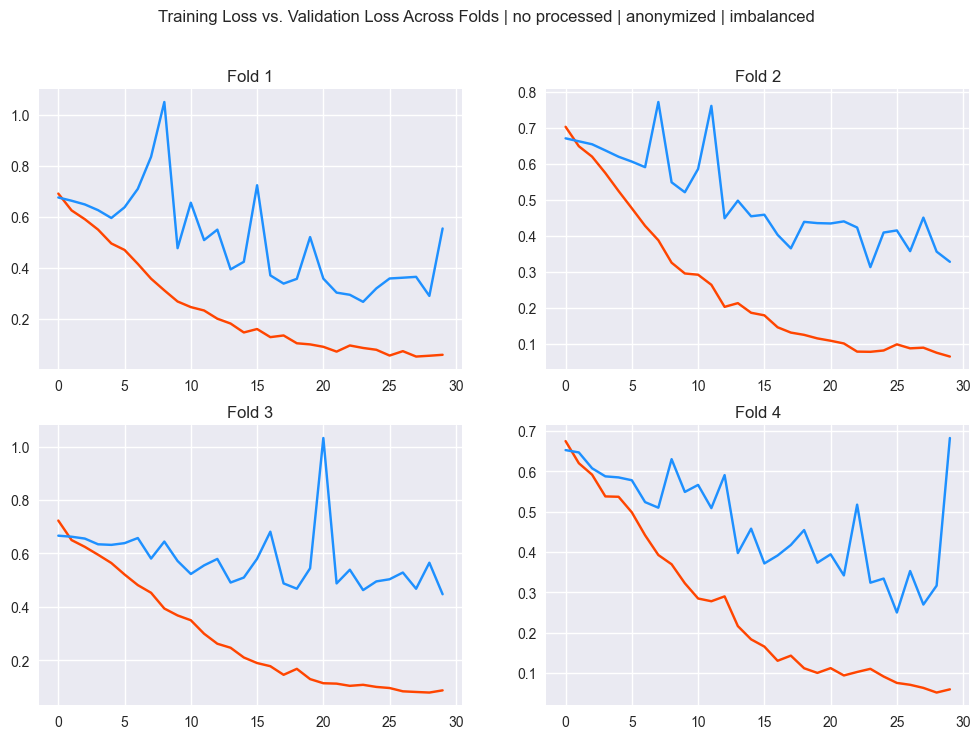

In [70]:
plotter.plot_subplots_curve(all_losses_3, all_val_losses_3, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | imbalanced ")

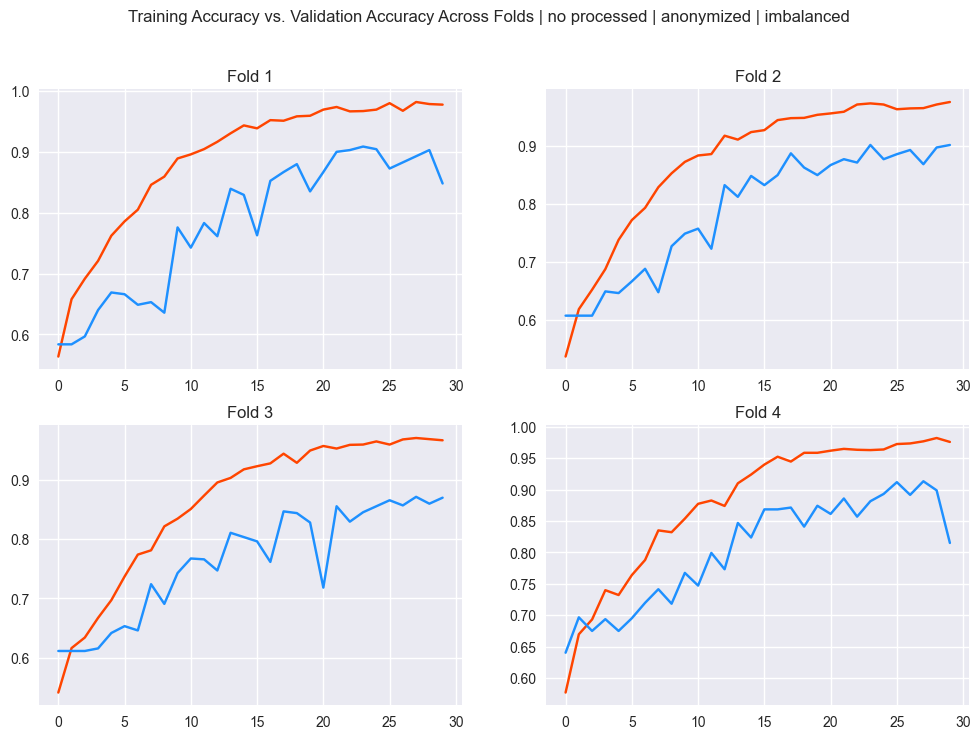

In [71]:
plotter.plot_subplots_curve(all_accuracies_3, all_val_accuracies_3, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | imbalanced")

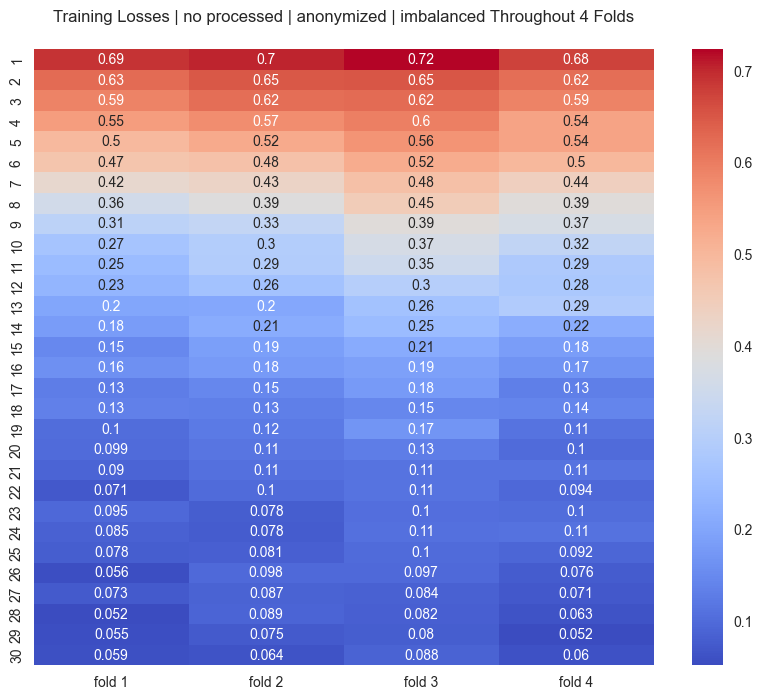

In [72]:
plotter.plot_heatmap(all_losses_3, "Training Losses | no processed | anonymized | imbalanced")

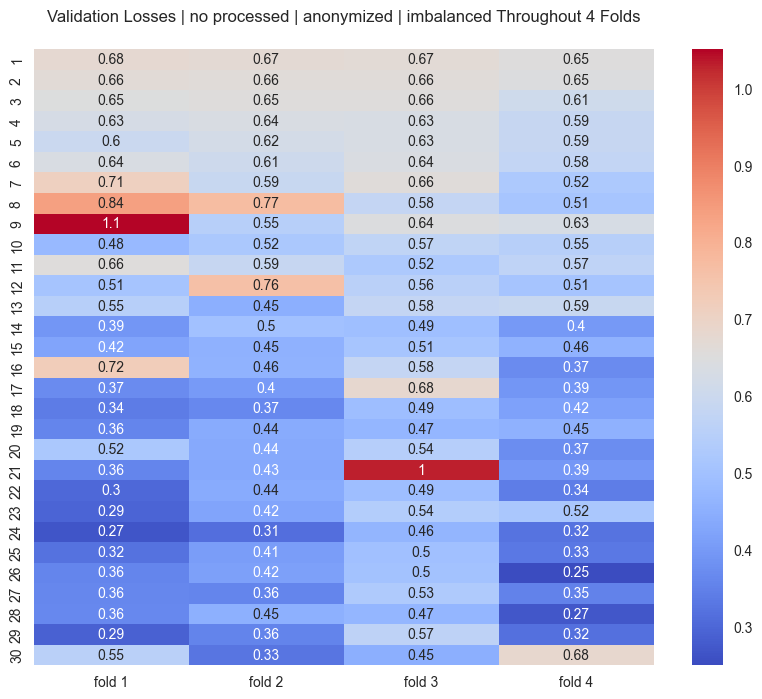

In [73]:
plotter.plot_heatmap(all_val_losses_3, "Validation Losses | no processed | anonymized | imbalanced")

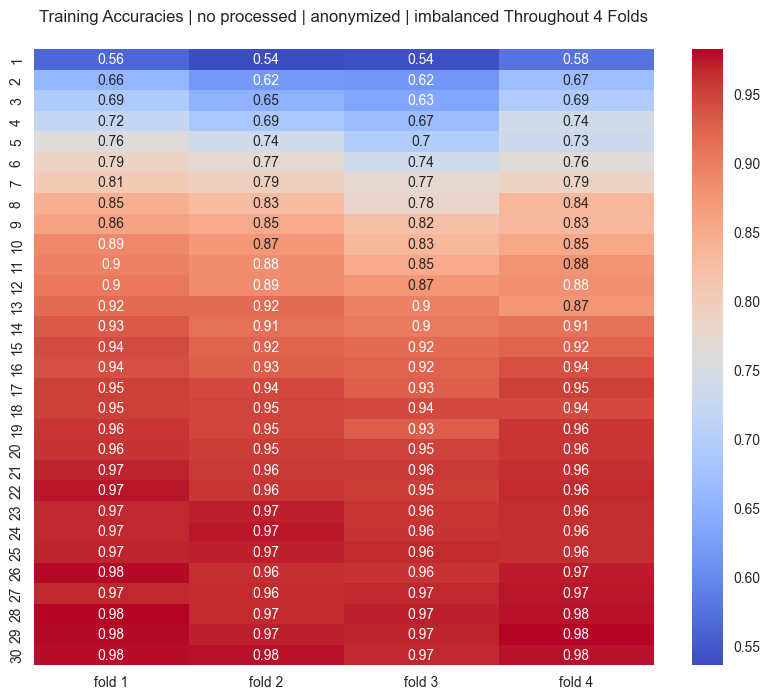

In [74]:
plotter.plot_heatmap(all_accuracies_3, "Training Accuracies | no processed | anonymized | imbalanced")

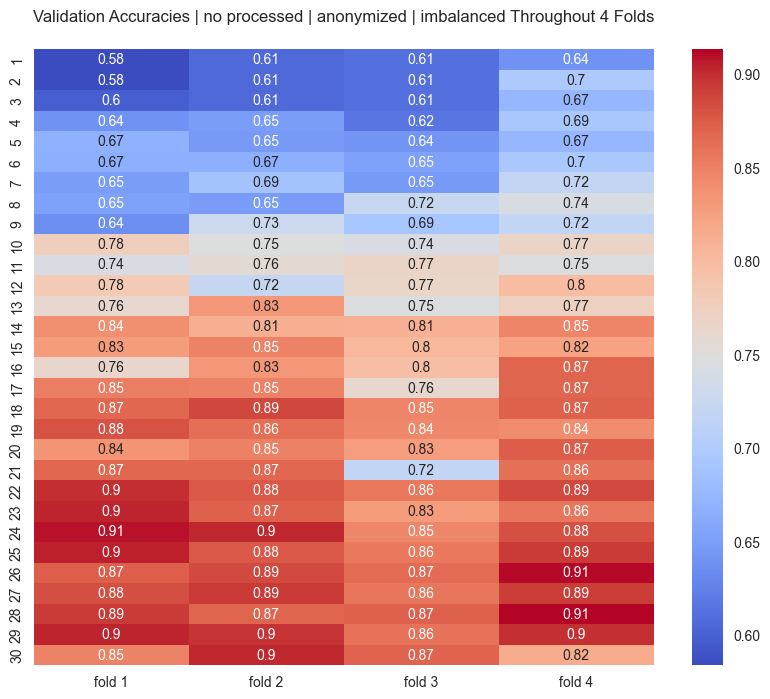

In [75]:
plotter.plot_heatmap(all_val_accuracies_3, "Validation Accuracies | no processed | anonymized | imbalanced")

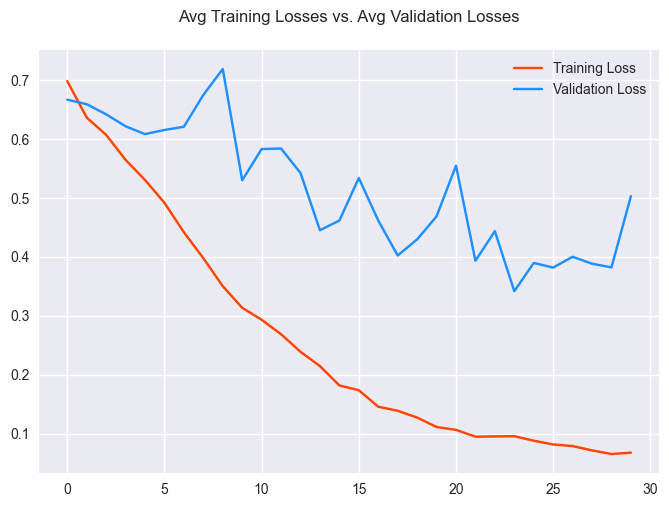

In [76]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_3, avg_val_loss_hist_3, "Training Loss", "Validation Loss")

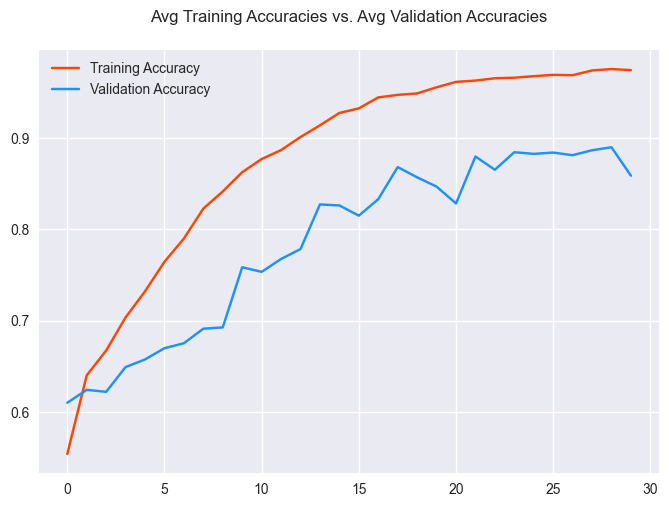

In [77]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_3, avg_val_acc_hist_3, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 3s 34ms/step


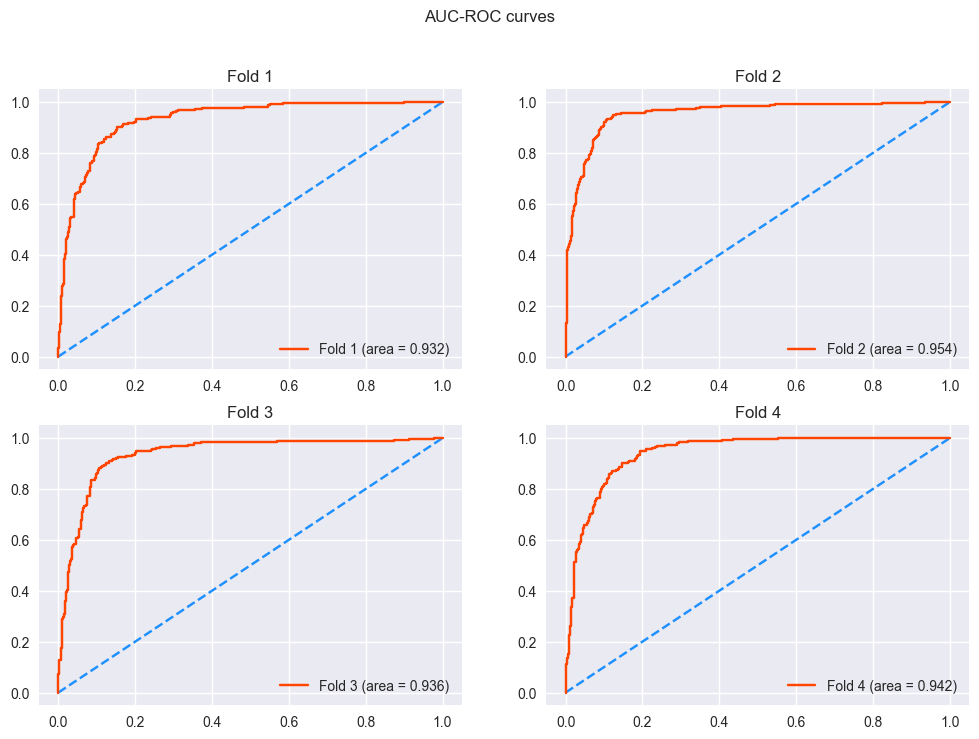

In [78]:
plotter.plot_roc_curve(all_models_3, X_test_vectors_3, y_test)

22/22 [==============================] - 1s 35ms/step


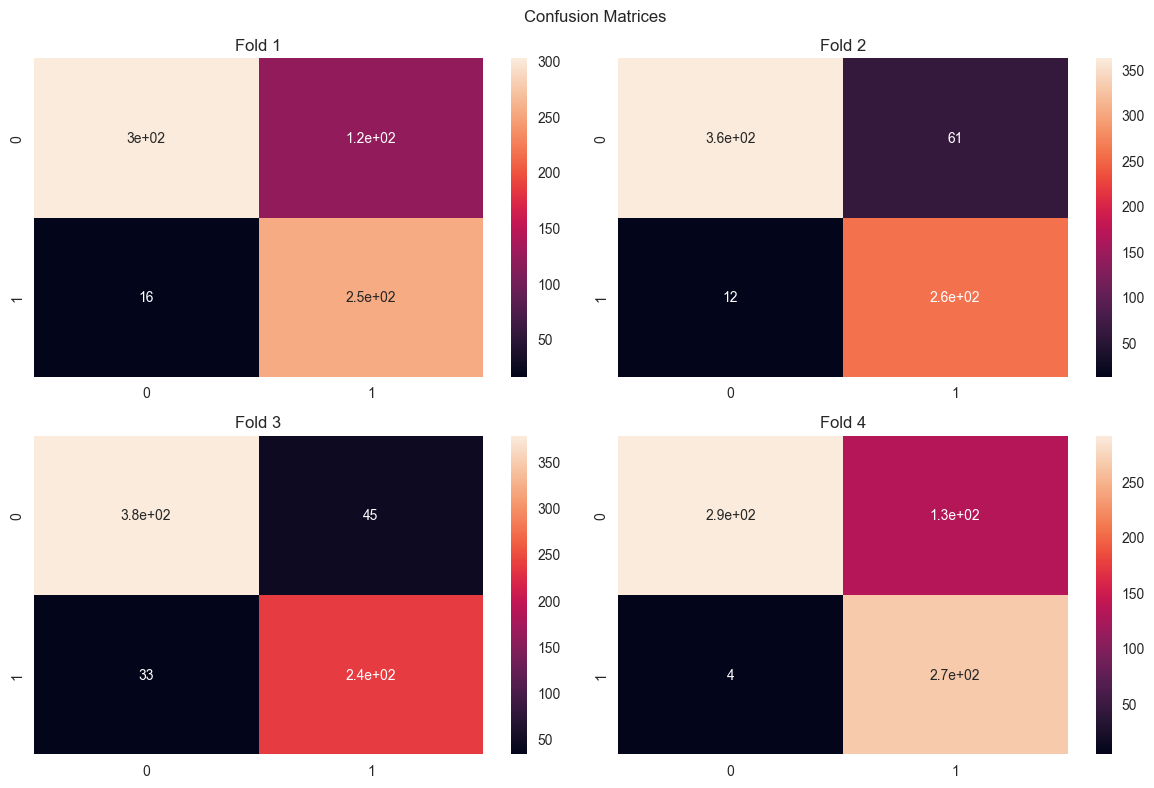

In [79]:
plotter.plot_confusion_matrix(all_models_3, X_test_vectors_3, y_test)

In [80]:
for i, trained_model in enumerate(all_models_3):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_3, y_test))

Model 1:
22/22 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

           0       0.95      0.71      0.82       423
           1       0.68      0.94      0.79       270

    accuracy                           0.80       693
   macro avg       0.81      0.83      0.80       693
weighted avg       0.84      0.80      0.80       693

Model 2:
22/22 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       423
           1       0.81      0.96      0.88       270

    accuracy                           0.89       693
   macro avg       0.89      0.91      0.89       693
weighted avg       0.91      0.89      0.90       693

Model 3:
22/22 [==============================] - 1s 35ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       423
           1       0.84      0.88      0.86     

In [81]:
print_testing_loss_accuracy(all_models_3, X_test_vectors_3, y_test)

model: 1
22/22 [==============================] - 1s 34ms/step - loss: 0.7330 - accuracy: 0.8023
model: 2
22/22 [==============================] - 1s 35ms/step - loss: 0.3751 - accuracy: 0.8947
model: 3
22/22 [==============================] - 1s 35ms/step - loss: 0.3992 - accuracy: 0.8874
model: 4
22/22 [==============================] - 1s 35ms/step - loss: 0.7967 - accuracy: 0.8038
average testing loss: 0.576
average testing accuracy: 0.847


### Combination 4: (No Processing - Anonymization - Balancing)


In [82]:
first_party_names_4 = X_train["first_party"]
second_party_names_4 = X_train["second_party"]
facts_4 = X_train["Facts"]

In [83]:
test_first_party_names_4 = X_test["first_party"]
test_second_party_names_4 = X_test["second_party"]
test_facts_4 = X_test["Facts"]

In [84]:
anonymized_facts_4 = preprocessor.anonymize_data(first_party_names_4, second_party_names_4, facts_4)
test_anonymized_facts_4 = preprocessor.anonymize_data(test_first_party_names_4, test_second_party_names_4, test_facts_4)

In [85]:
balanced_anonymized_df = preprocessor.balance_data(anonymized_facts_4, y_train)
balanced_anonymized_df = balanced_anonymized_df.rename(columns={0: "Facts"})

In [86]:
X_train_balanced_anonymized = balanced_anonymized_df["Facts"]
y_train_balanced_anonymized = balanced_anonymized_df["winner_index"]

In [87]:
glove_tokenizer_4, X_train_vectors_4 = preprocessor.convert_text_to_vectors_glove(X_train_balanced_anonymized)

In [88]:
X_test_vectors_4 = preprocessor.convert_text_to_vectors_glove(test_anonymized_facts_4, train=False, glove_tokenizer=glove_tokenizer_4)

In [89]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_4)

In [90]:
all_models_4, all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4 = train_model(build_glove_model, X_train_vectors_4, y_train_balanced_anonymized)

fold: 1
Epoch 1/30
40/40 [==============================] - 18s 168ms/step - loss: 0.6999 - accuracy: 0.5325 - val_loss: 0.6911 - val_accuracy: 0.4947
Epoch 2/30
40/40 [==============================] - 4s 109ms/step - loss: 0.6552 - accuracy: 0.6141 - val_loss: 0.6816 - val_accuracy: 0.5503
Epoch 3/30
40/40 [==============================] - 4s 108ms/step - loss: 0.6031 - accuracy: 0.6740 - val_loss: 0.6871 - val_accuracy: 0.5314
Epoch 4/30
40/40 [==============================] - 4s 109ms/step - loss: 0.5416 - accuracy: 0.7233 - val_loss: 0.6226 - val_accuracy: 0.6414
Epoch 5/30
40/40 [==============================] - 4s 109ms/step - loss: 0.4798 - accuracy: 0.7682 - val_loss: 0.5381 - val_accuracy: 0.7254
Epoch 6/30
40/40 [==============================] - 4s 112ms/step - loss: 0.4134 - accuracy: 0.8088 - val_loss: 0.4796 - val_accuracy: 0.7491
Epoch 7/30
40/40 [==============================] - 4s 112ms/step - loss: 0.3652 - accuracy: 0.8388 - val_loss: 0.4685 - val_accuracy: 0.77

In [91]:
avg_loss_hist_4, avg_val_loss_hist_4, avg_acc_hist_4, avg_val_acc_hist_4 = calculate_average_measures(all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4)

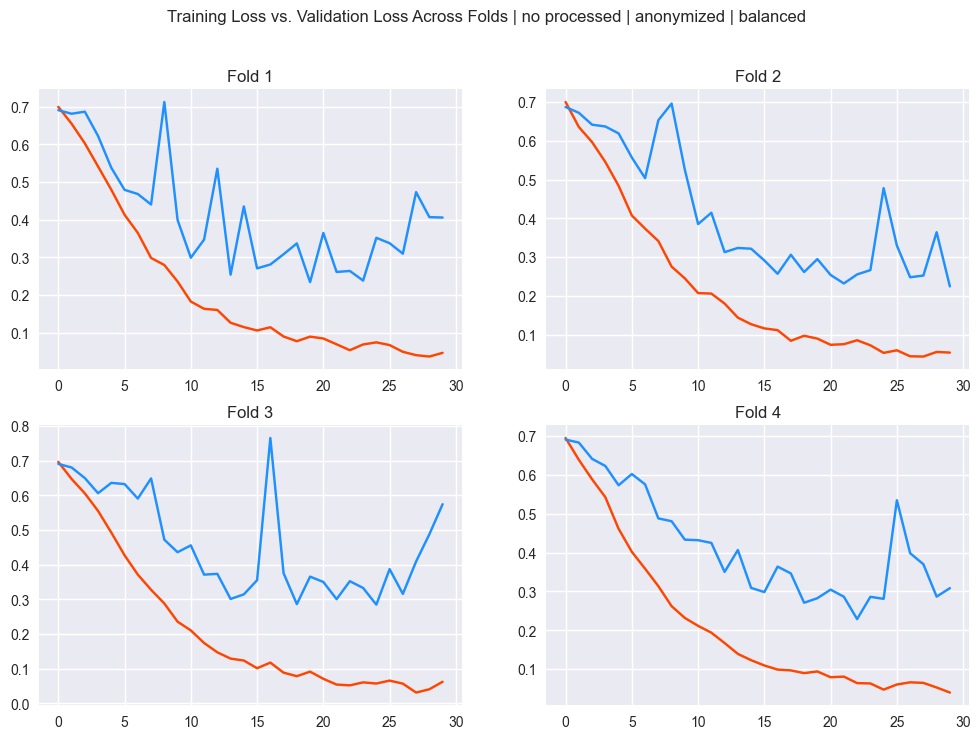

In [92]:
plotter.plot_subplots_curve(all_losses_4, all_val_losses_4, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | balanced ")

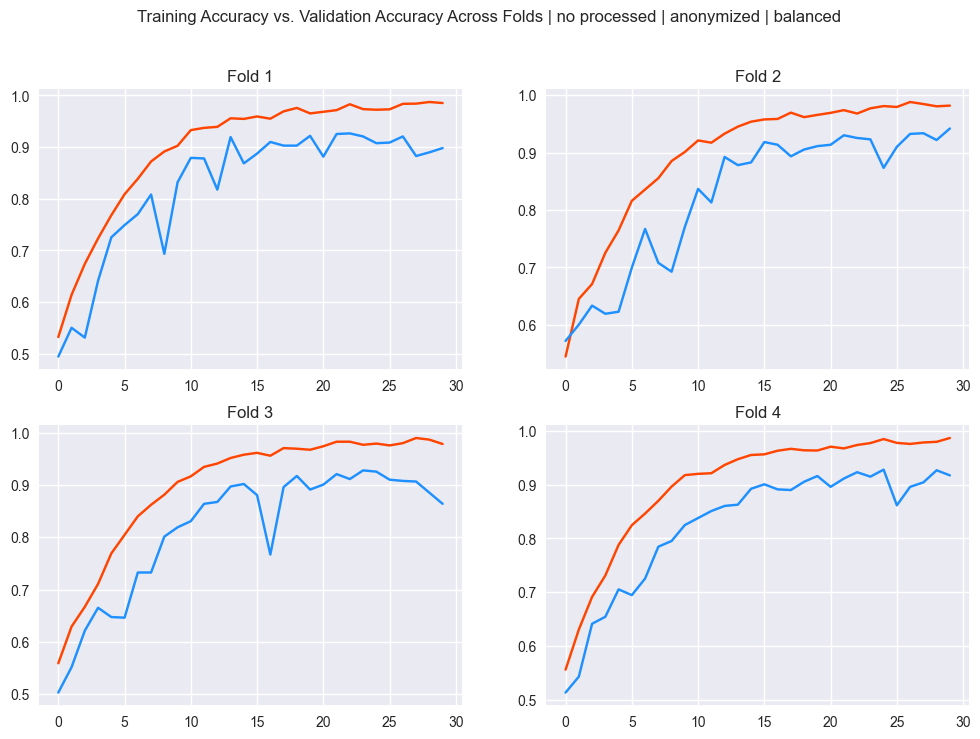

In [93]:
plotter.plot_subplots_curve(all_accuracies_4, all_val_accuracies_4, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | balanced")

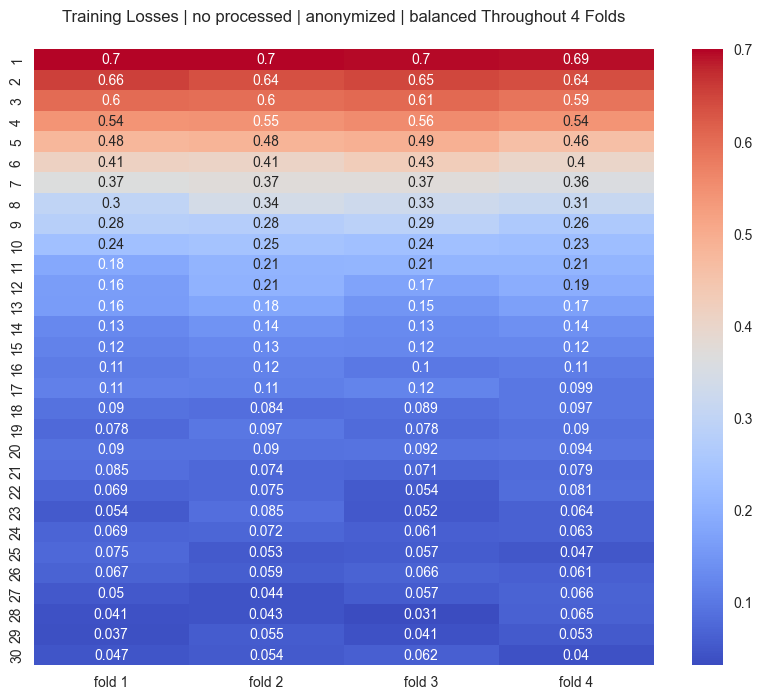

In [94]:
plotter.plot_heatmap(all_losses_4, "Training Losses | no processed | anonymized | balanced")

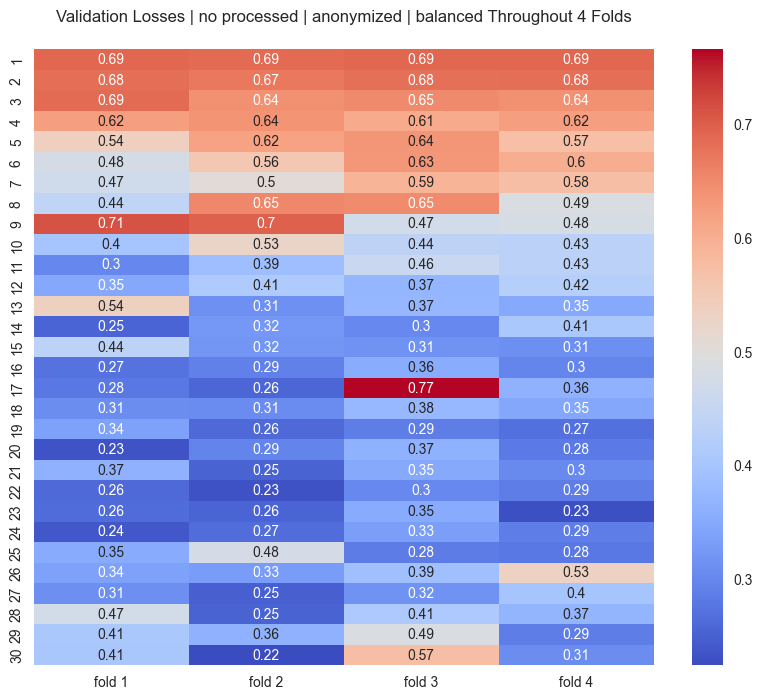

In [95]:
plotter.plot_heatmap(all_val_losses_4, "Validation Losses | no processed | anonymized | balanced")

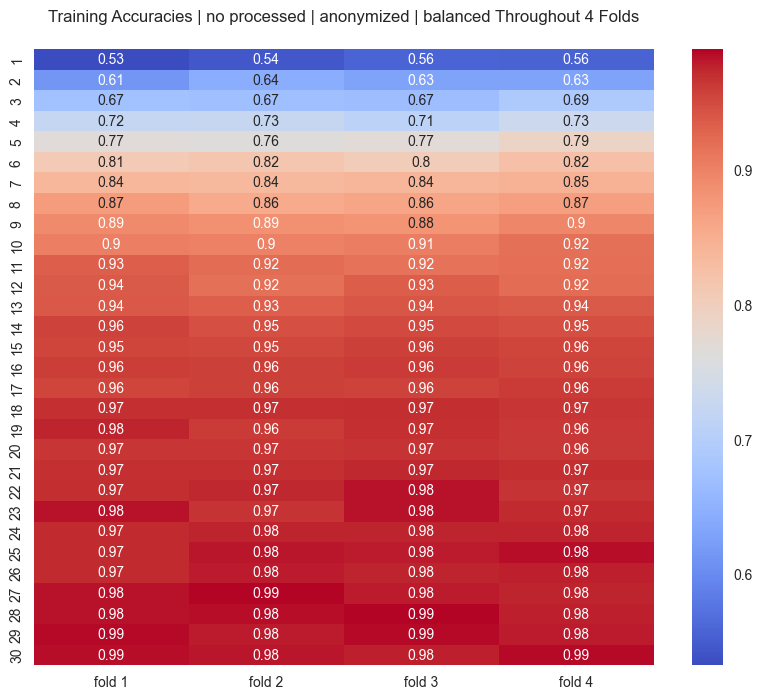

In [96]:
plotter.plot_heatmap(all_accuracies_4, "Training Accuracies | no processed | anonymized | balanced")

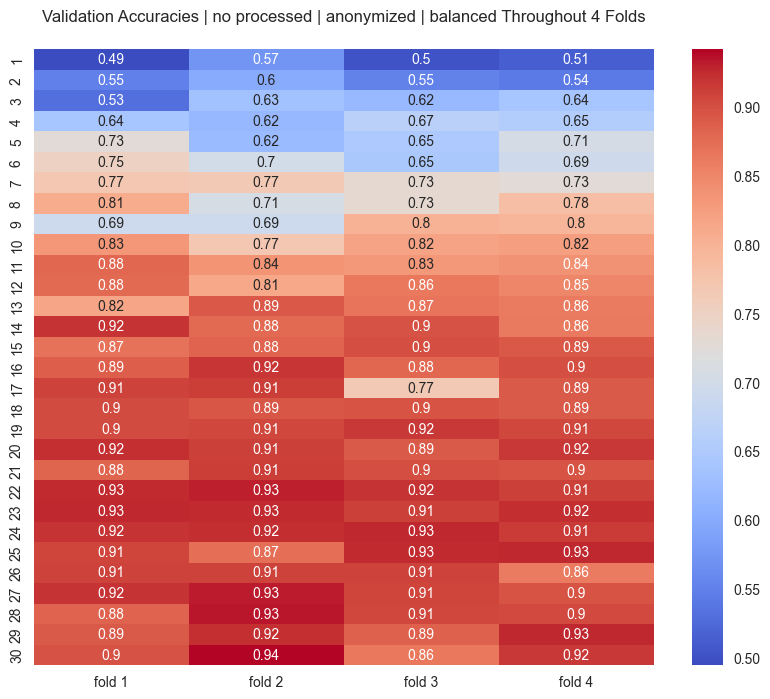

In [97]:
plotter.plot_heatmap(all_val_accuracies_4, "Validation Accuracies | no processed | anonymized | balanced")

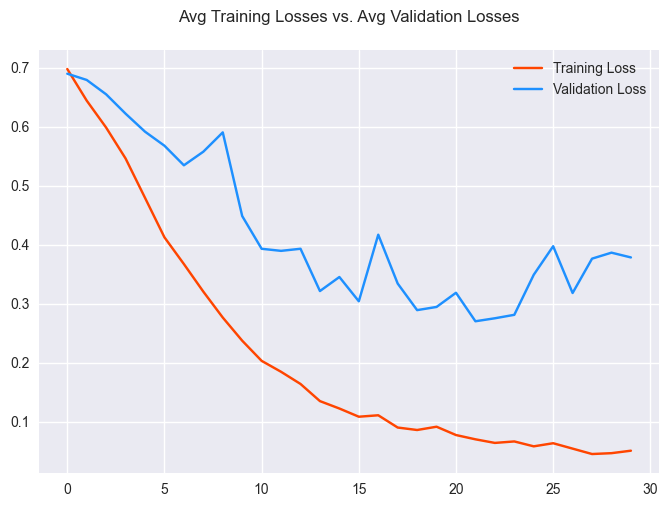

In [98]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_4, avg_val_loss_hist_4, "Training Loss", "Validation Loss")

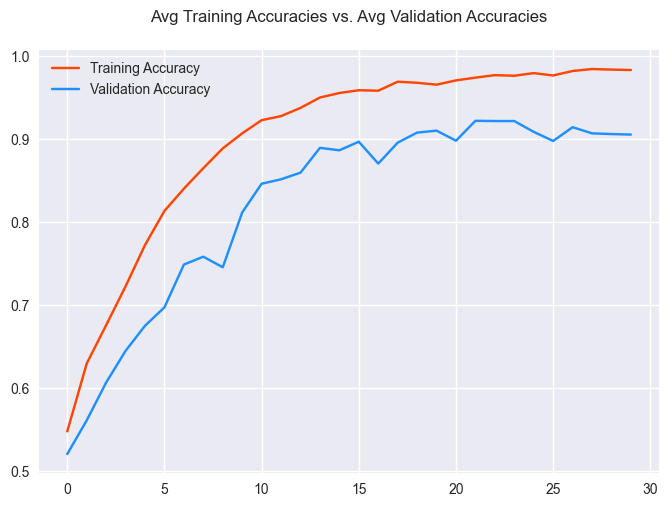

In [99]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_4, avg_val_acc_hist_4, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 13s 83ms/step


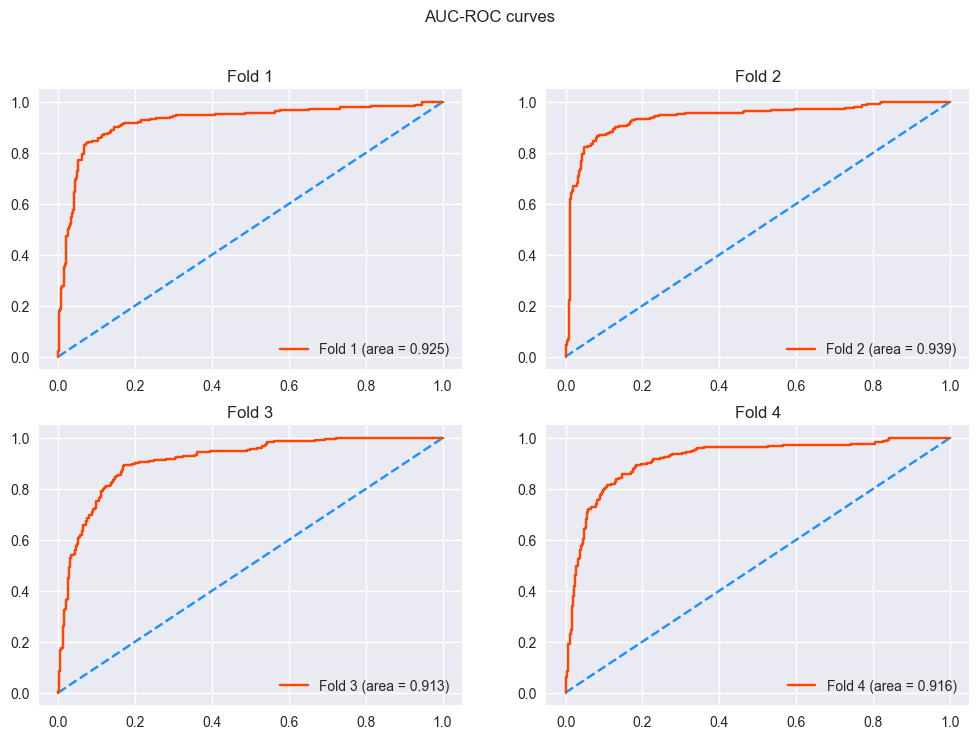

In [100]:
plotter.plot_roc_curve(all_models_4, X_test_vectors_4, y_test)

22/22 [==============================] - 2s 83ms/step


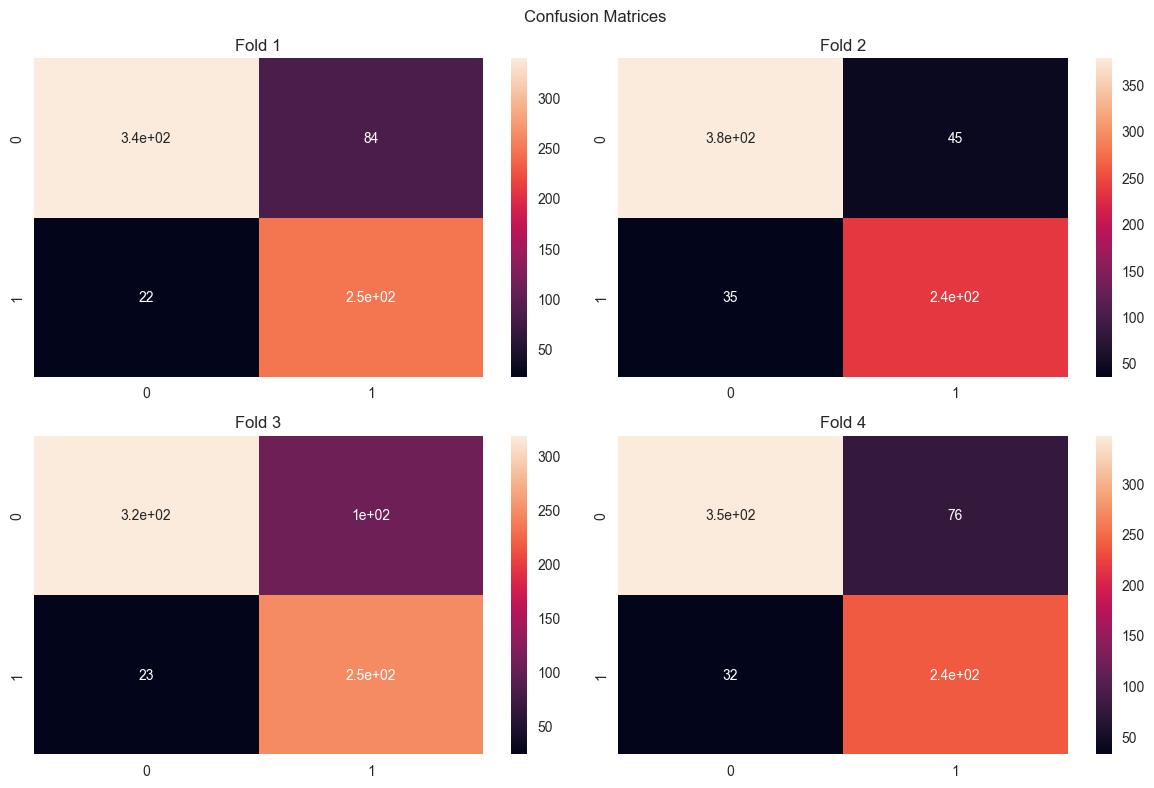

In [101]:
plotter.plot_confusion_matrix(all_models_4, X_test_vectors_4, y_test)

In [102]:
for i, trained_model in enumerate(all_models_4):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_4, y_test))

Model 1:
22/22 [==============================] - 2s 88ms/step
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       423
           1       0.75      0.92      0.82       270

    accuracy                           0.85       693
   macro avg       0.84      0.86      0.84       693
weighted avg       0.86      0.85      0.85       693

Model 2:
22/22 [==============================] - 2s 85ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       423
           1       0.84      0.87      0.85       270

    accuracy                           0.88       693
   macro avg       0.88      0.88      0.88       693
weighted avg       0.89      0.88      0.88       693

Model 3:
22/22 [==============================] - 2s 84ms/step
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       423
           1       0.70      0.91      0.79     

In [103]:
print_testing_loss_accuracy(all_models_4, X_test_vectors_4, y_test)

model: 1
22/22 [==============================] - 2s 85ms/step - loss: 0.6846 - accuracy: 0.8470
model: 2
22/22 [==============================] - 2s 89ms/step - loss: 0.4638 - accuracy: 0.8846
model: 3
22/22 [==============================] - 2s 84ms/step - loss: 0.8619 - accuracy: 0.8153
model: 4
22/22 [==============================] - 2s 84ms/step - loss: 0.6215 - accuracy: 0.8442
average testing loss: 0.658
average testing accuracy: 0.848


### Combination 5: (Processing - No anonymization - Imbalancing)

In [104]:
X_train_processed = preprocessor.preprocess_data(X_train["Facts"])
X_test_processed = preprocessor.preprocess_data(X_test["Facts"])

In [105]:
glove_tokenizer_5, X_train_vectors_5 = preprocessor.convert_text_to_vectors_glove(X_train_processed)

In [106]:
X_test_vectors_5 = preprocessor.convert_text_to_vectors_glove(X_test_processed, train=False, glove_tokenizer=glove_tokenizer_5)

In [107]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_5)

In [108]:
all_models_5, all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5 = train_model(build_glove_model, X_train_vectors_5, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 88s 704ms/step - loss: 0.6977 - accuracy: 0.5685 - val_loss: 0.6728 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 12s 353ms/step - loss: 0.6175 - accuracy: 0.6734 - val_loss: 0.6634 - val_accuracy: 0.5838
Epoch 3/30
33/33 [==============================] - 12s 355ms/step - loss: 0.5551 - accuracy: 0.7249 - val_loss: 0.6440 - val_accuracy: 0.6199
Epoch 4/30
33/33 [==============================] - 12s 363ms/step - loss: 0.5014 - accuracy: 0.7571 - val_loss: 0.6563 - val_accuracy: 0.6315
Epoch 5/30
33/33 [==============================] - 12s 375ms/step - loss: 0.4326 - accuracy: 0.8028 - val_loss: 0.6762 - val_accuracy: 0.6503
Epoch 6/30
33/33 [==============================] - 12s 374ms/step - loss: 0.3744 - accuracy: 0.8461 - val_loss: 0.8085 - val_accuracy: 0.6228
Epoch 7/30
33/33 [==============================] - 12s 365ms/step - loss: 0.3017 - accuracy: 0.8783 - val_loss: 0.7064 - val_accuracy

In [109]:
avg_loss_hist_5, avg_val_loss_hist_5, avg_acc_hist_5, avg_val_acc_hist_5 = calculate_average_measures(all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5)

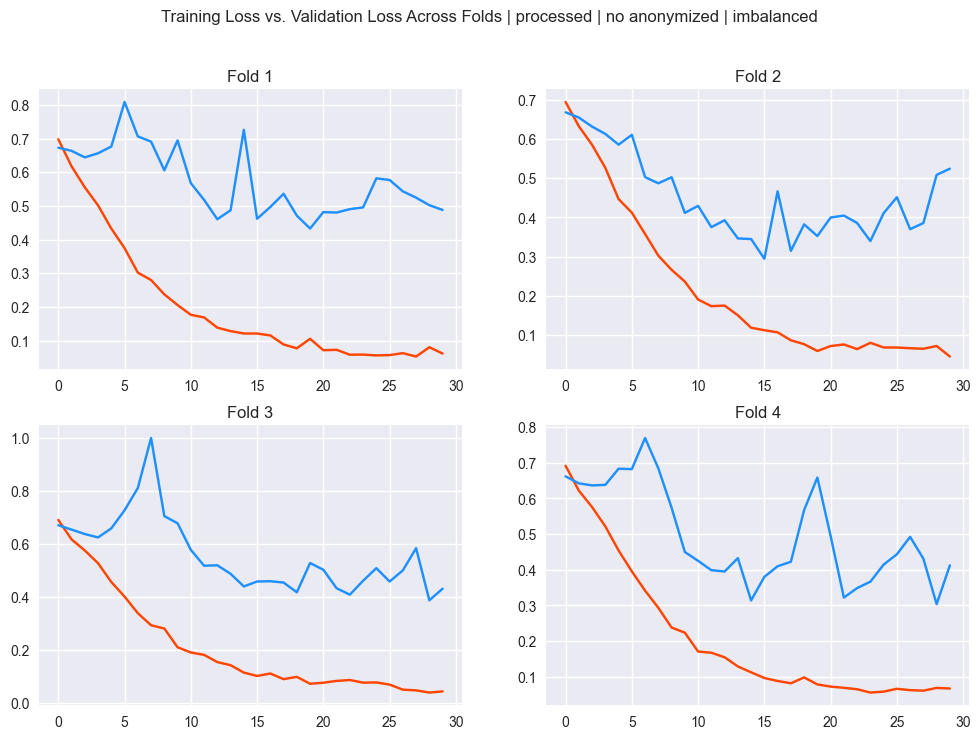

In [110]:
plotter.plot_subplots_curve(all_losses_5, all_val_losses_5, "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | imbalanced")

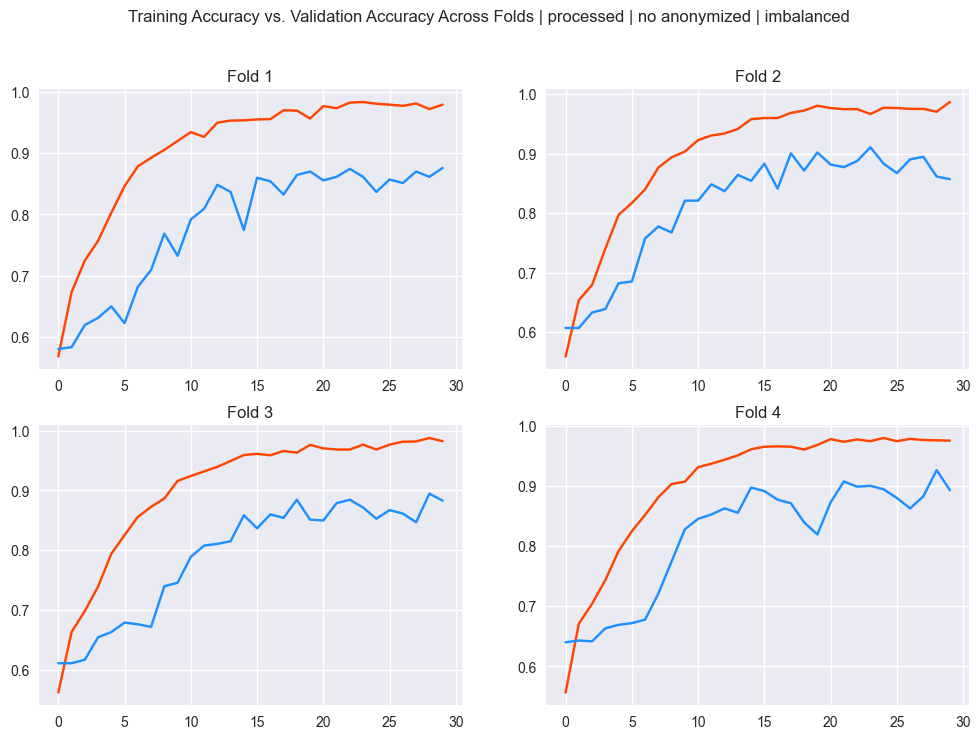

In [111]:
plotter.plot_subplots_curve(all_accuracies_5, all_val_accuracies_5, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | imbalanced")

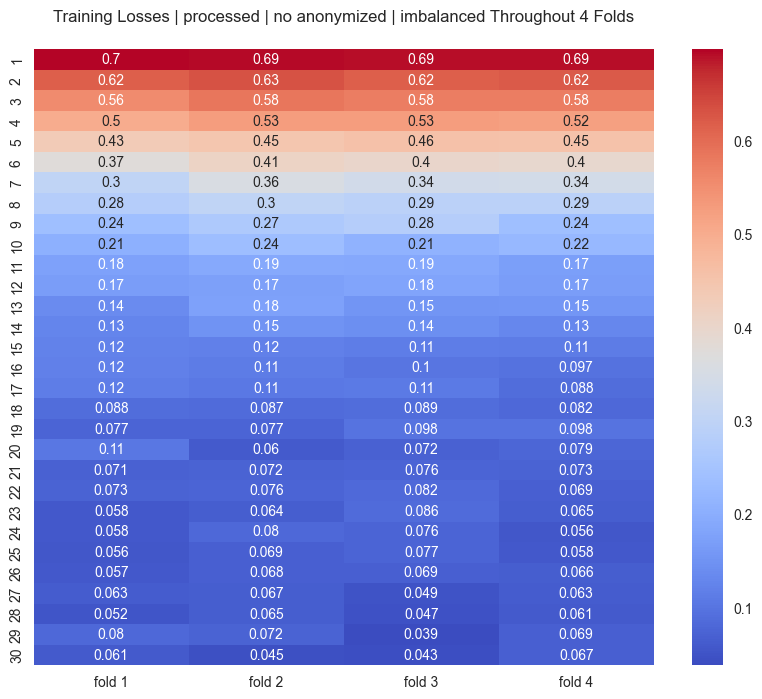

In [112]:
plotter.plot_heatmap(all_losses_5, "Training Losses | processed | no anonymized | imbalanced")

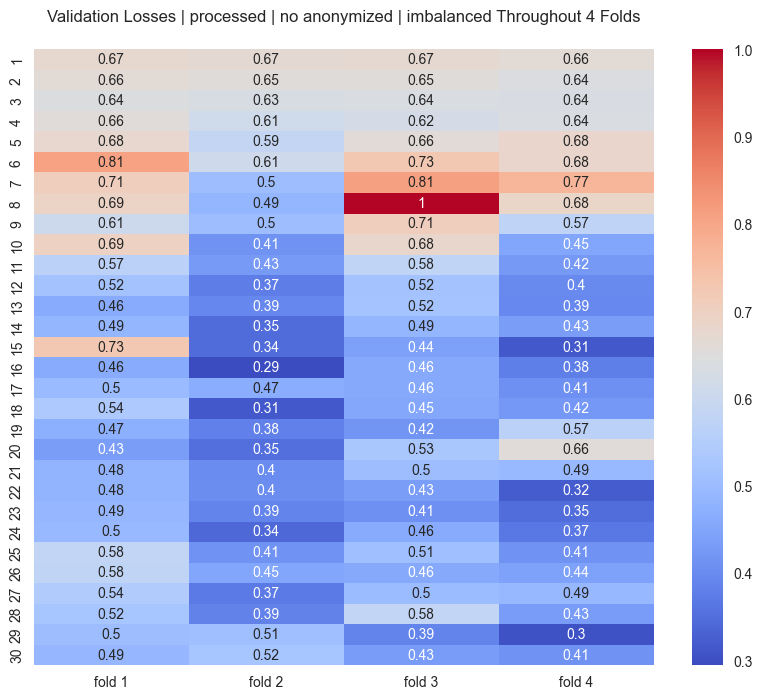

In [113]:
plotter.plot_heatmap(all_val_losses_5, "Validation Losses | processed | no anonymized | imbalanced")

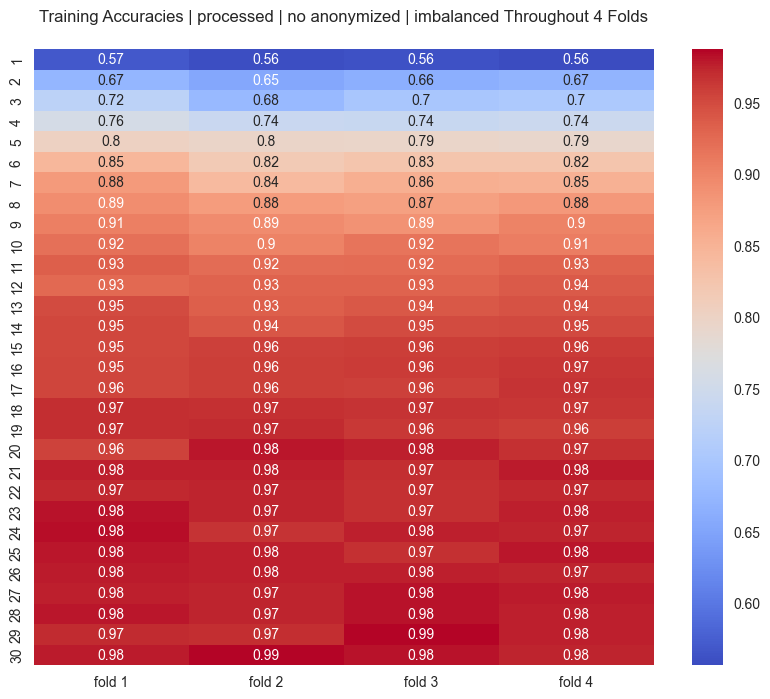

In [114]:
plotter.plot_heatmap(all_accuracies_5, "Training Accuracies | processed | no anonymized | imbalanced")

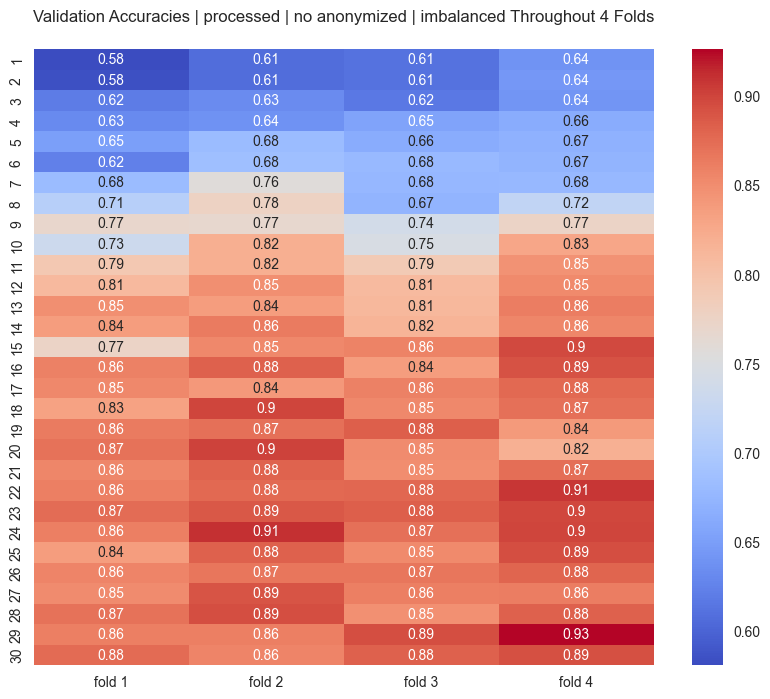

In [115]:
plotter.plot_heatmap(all_val_accuracies_5, "Validation Accuracies | processed | no anonymized | imbalanced")

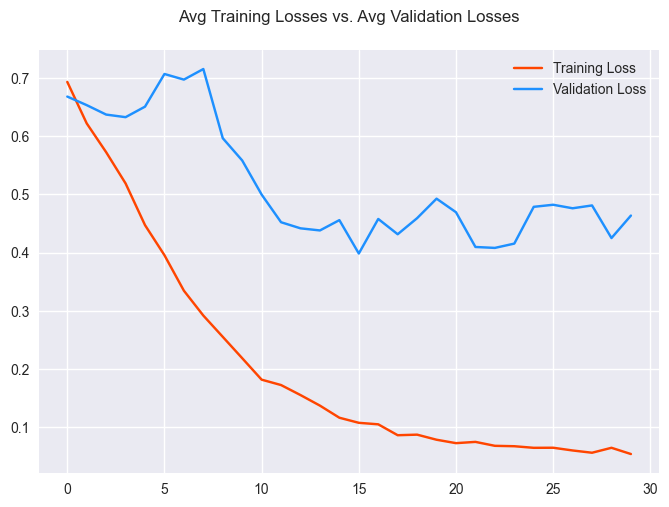

In [116]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_5, avg_val_loss_hist_5, "Training Loss", "Validation Loss")

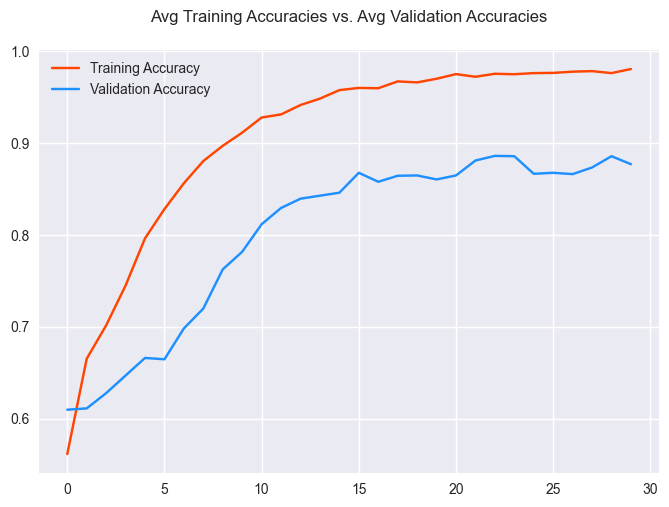

In [117]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_5, avg_val_acc_hist_5, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 12s 80ms/step


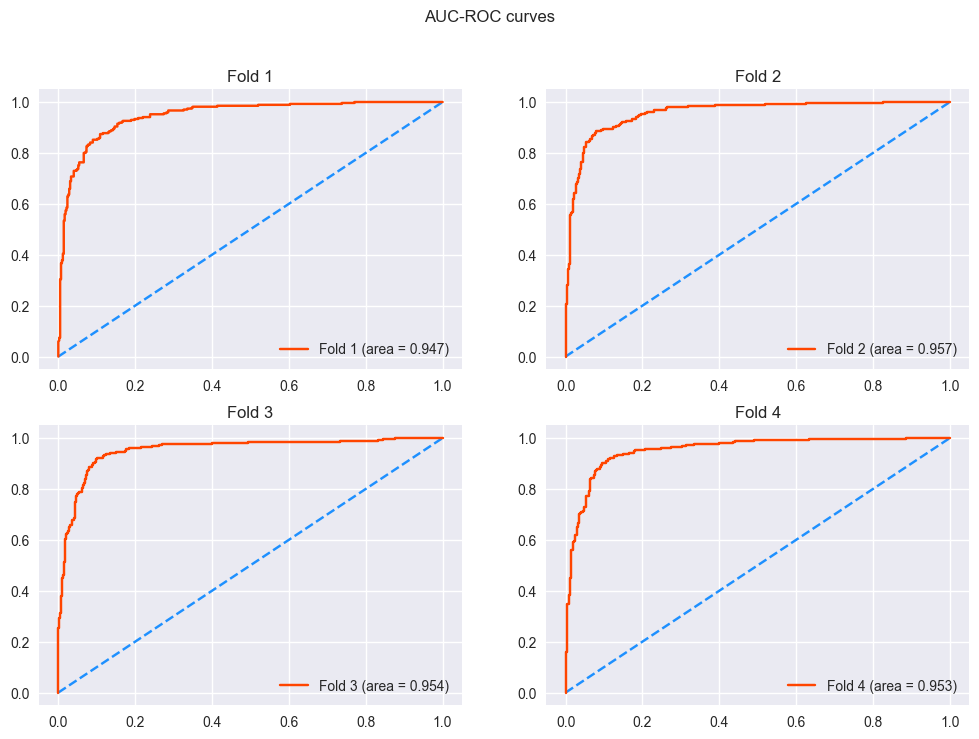

In [118]:
plotter.plot_roc_curve(all_models_5, X_test_vectors_5, y_test)

22/22 [==============================] - 2s 82ms/step


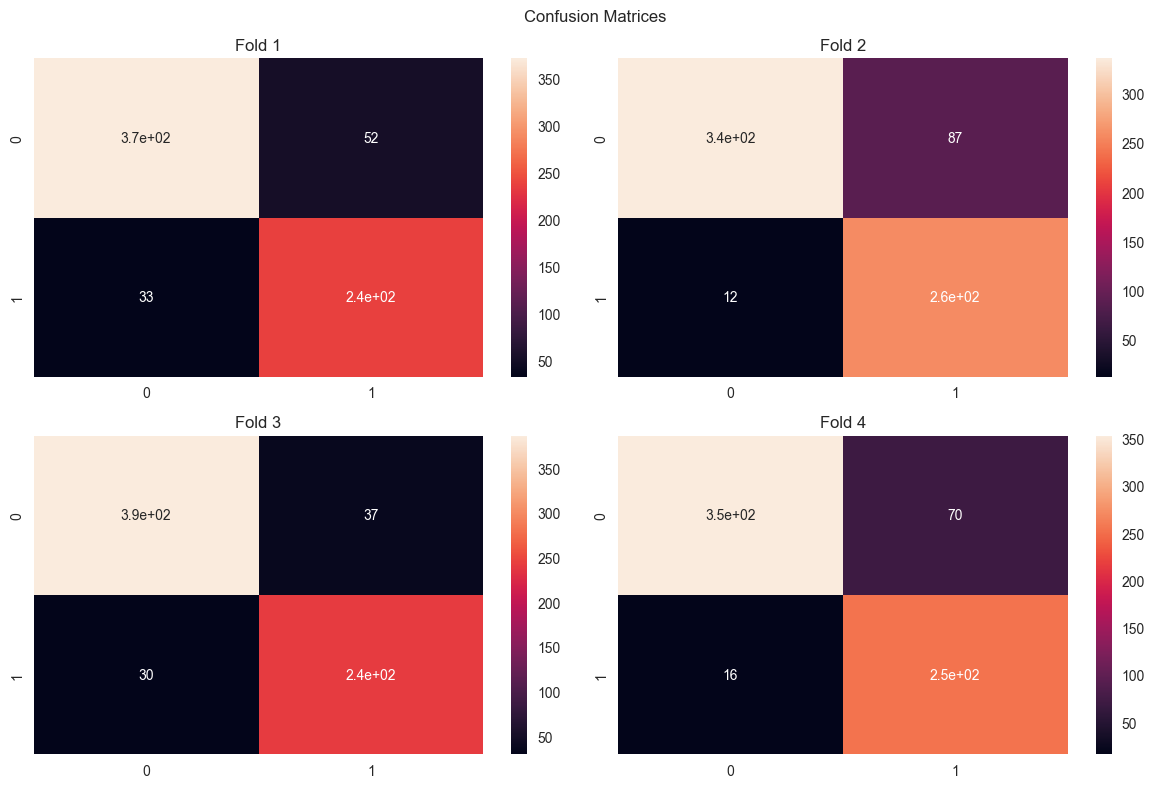

In [119]:
plotter.plot_confusion_matrix(all_models_5, X_test_vectors_5, y_test)

In [120]:
for i, trained_model in enumerate(all_models_5):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_5, y_test))

Model 1:
22/22 [==============================] - 2s 82ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       423
           1       0.82      0.88      0.85       270

    accuracy                           0.88       693
   macro avg       0.87      0.88      0.87       693
weighted avg       0.88      0.88      0.88       693

Model 2:
22/22 [==============================] - 2s 82ms/step
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       423
           1       0.75      0.96      0.84       270

    accuracy                           0.86       693
   macro avg       0.86      0.87      0.86       693
weighted avg       0.88      0.86      0.86       693

Model 3:
22/22 [==============================] - 2s 82ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       423
           1       0.87      0.89      0.88     

In [121]:
print_testing_loss_accuracy(all_models_5, X_test_vectors_5, y_test)

model: 1
22/22 [==============================] - 2s 83ms/step - loss: 0.4147 - accuracy: 0.8773
model: 2
22/22 [==============================] - 2s 91ms/step - loss: 0.5114 - accuracy: 0.8571
model: 3
22/22 [==============================] - 2s 85ms/step - loss: 0.3780 - accuracy: 0.9033
model: 4
22/22 [==============================] - 2s 85ms/step - loss: 0.4648 - accuracy: 0.8759
average testing loss: 0.442
average testing accuracy: 0.878


### Combination 6: (Processing - No anonymization - Balancing)

In [122]:
processed_balanced_df = preprocessor.balance_data(X_train_processed, y_train)
X_train_processed_balanced = processed_balanced_df["Facts"]
y_train_processed_balanced = processed_balanced_df["winner_index"]

In [123]:
glove_tokenizer_6, X_train_vectors_6 = preprocessor.convert_text_to_vectors_glove(X_train_processed_balanced)

In [124]:
X_test_vectors_6 = preprocessor.convert_text_to_vectors_glove(X_test_processed, train=False, glove_tokenizer=glove_tokenizer_6)

In [125]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_6)

In [126]:
all_models_6, all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6 = train_model(build_glove_model, X_train_vectors_6, y_train_processed_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 77s 645ms/step - loss: 0.6952 - accuracy: 0.5447 - val_loss: 0.6869 - val_accuracy: 0.5787
Epoch 2/30
40/40 [==============================] - 14s 347ms/step - loss: 0.6341 - accuracy: 0.6409 - val_loss: 0.6709 - val_accuracy: 0.5988
Epoch 3/30
40/40 [==============================] - 14s 349ms/step - loss: 0.5702 - accuracy: 0.7119 - val_loss: 0.6348 - val_accuracy: 0.6355
Epoch 4/30
40/40 [==============================] - 14s 357ms/step - loss: 0.4926 - accuracy: 0.7611 - val_loss: 0.6029 - val_accuracy: 0.6592
Epoch 5/30
40/40 [==============================] - 14s 345ms/step - loss: 0.4268 - accuracy: 0.8037 - val_loss: 0.5510 - val_accuracy: 0.7077
Epoch 6/30
40/40 [==============================] - 14s 342ms/step - loss: 0.3426 - accuracy: 0.8561 - val_loss: 0.6257 - val_accuracy: 0.6817
Epoch 7/30
40/40 [==============================] - 14s 343ms/step - loss: 0.2842 - accuracy: 0.8829 - val_loss: 0.4119 - val_accuracy

In [127]:
avg_loss_hist_6, avg_val_loss_hist_6, avg_acc_hist_6, avg_val_acc_hist_6 = calculate_average_measures(all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6)

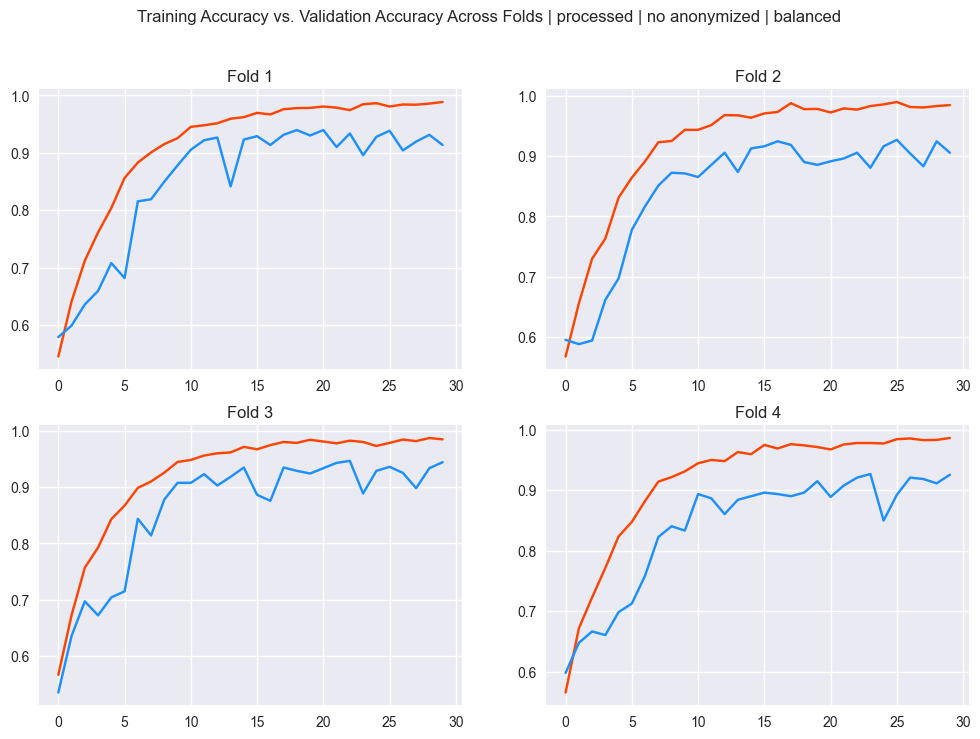

In [128]:
plotter.plot_subplots_curve(all_accuracies_6, all_val_accuracies_6, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | balanced")

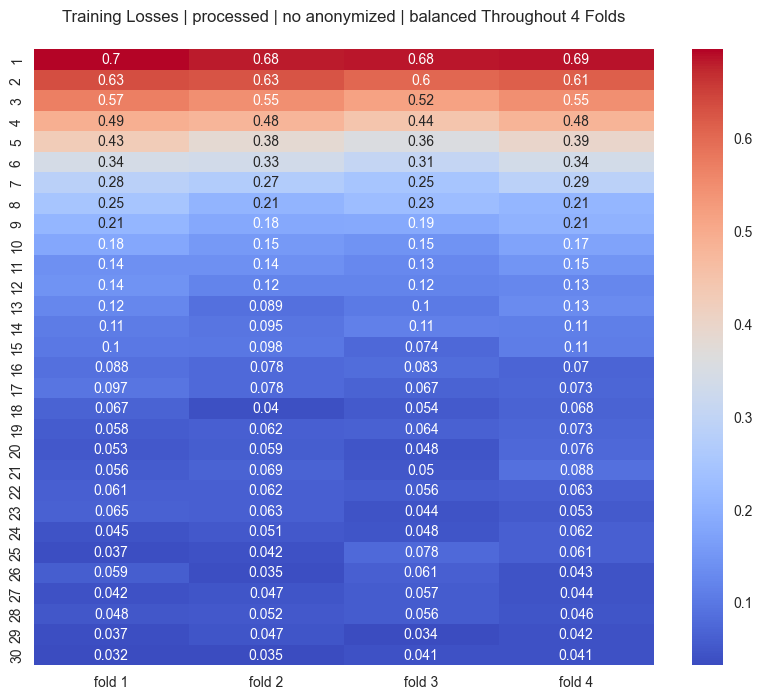

In [129]:
plotter.plot_heatmap(all_losses_6, "Training Losses | processed | no anonymized | balanced")

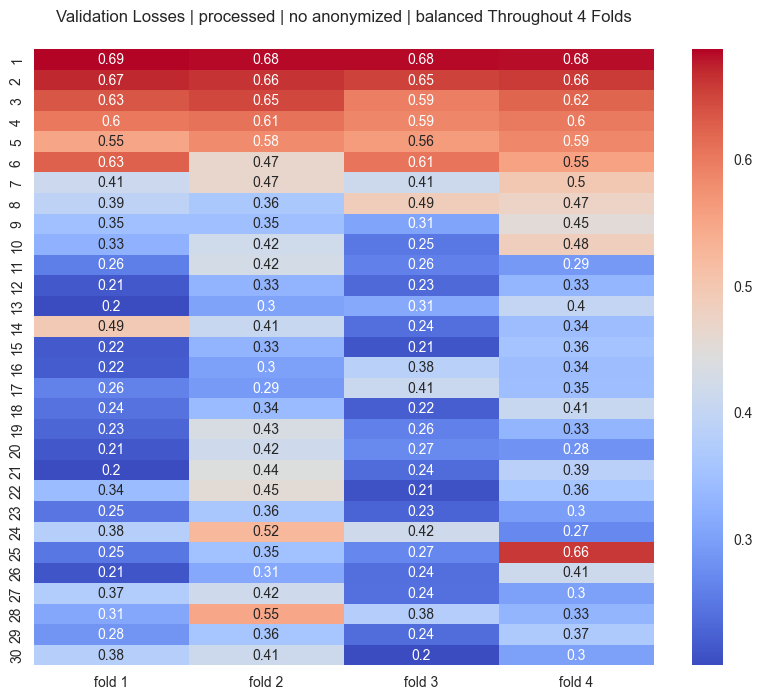

In [130]:
plotter.plot_heatmap(all_val_losses_6, "Validation Losses | processed | no anonymized | balanced")

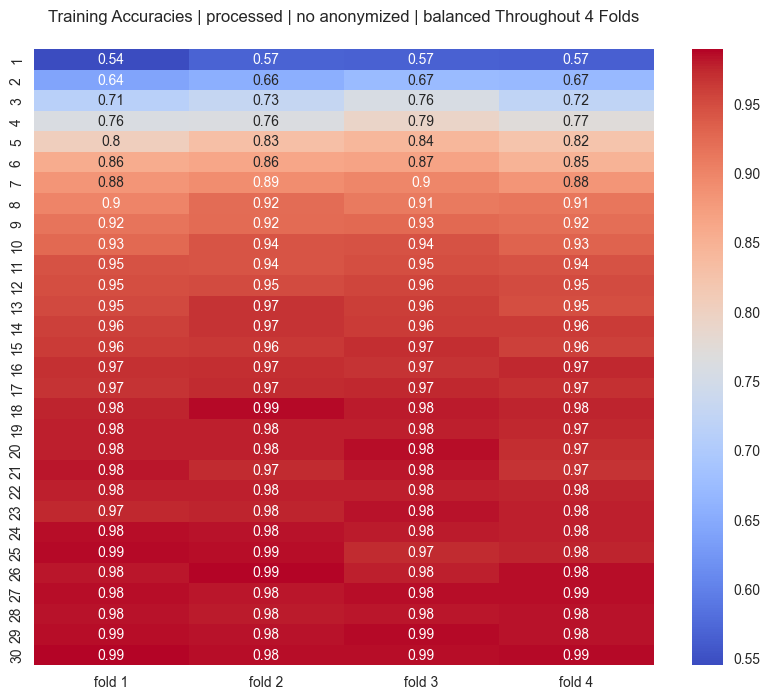

In [131]:
plotter.plot_heatmap(all_accuracies_6, "Training Accuracies | processed | no anonymized | balanced")

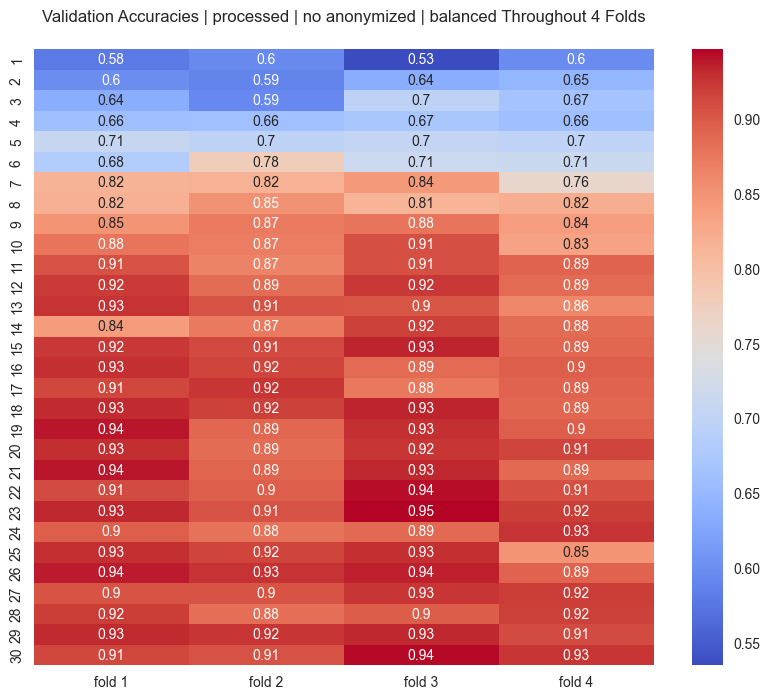

In [132]:
plotter.plot_heatmap(all_val_accuracies_6, "Validation Accuracies | processed | no anonymized | balanced")

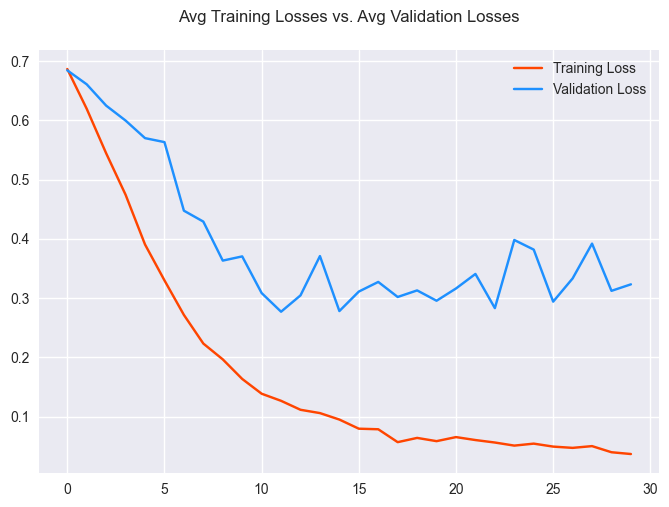

In [133]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_6, avg_val_loss_hist_6, "Training Loss", "Validation Loss")

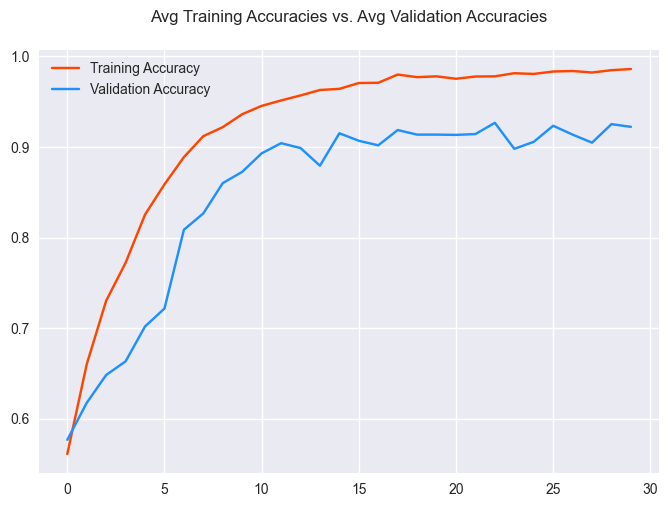

In [134]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_6, avg_val_acc_hist_6, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 16s 81ms/step


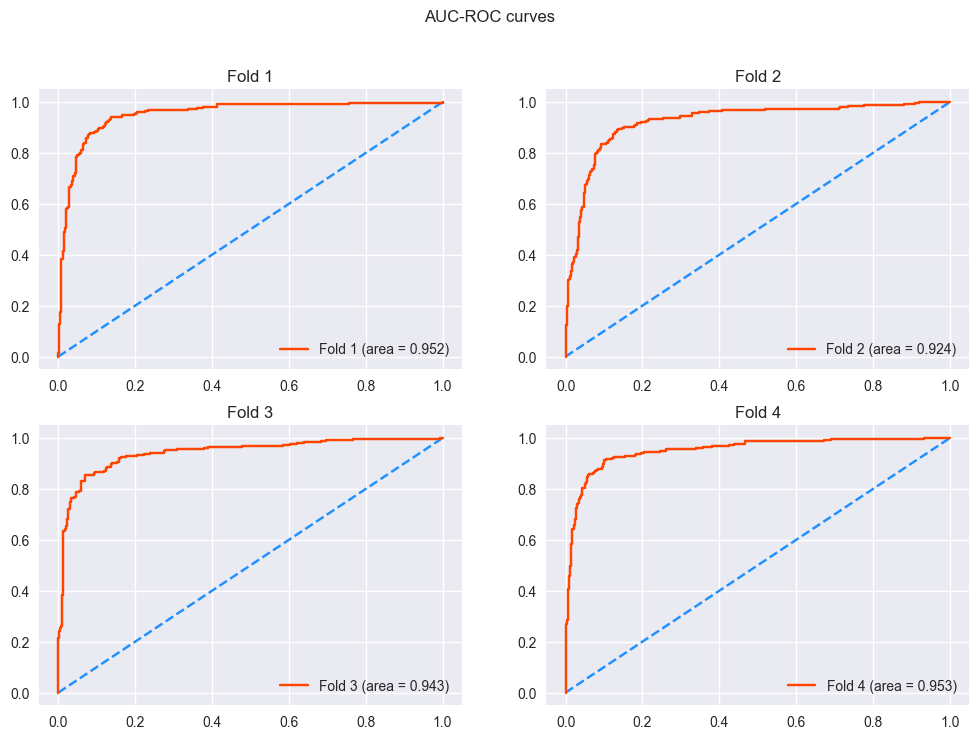

In [135]:
plotter.plot_roc_curve(all_models_6, X_test_vectors_6, y_test)

22/22 [==============================] - 2s 80ms/step


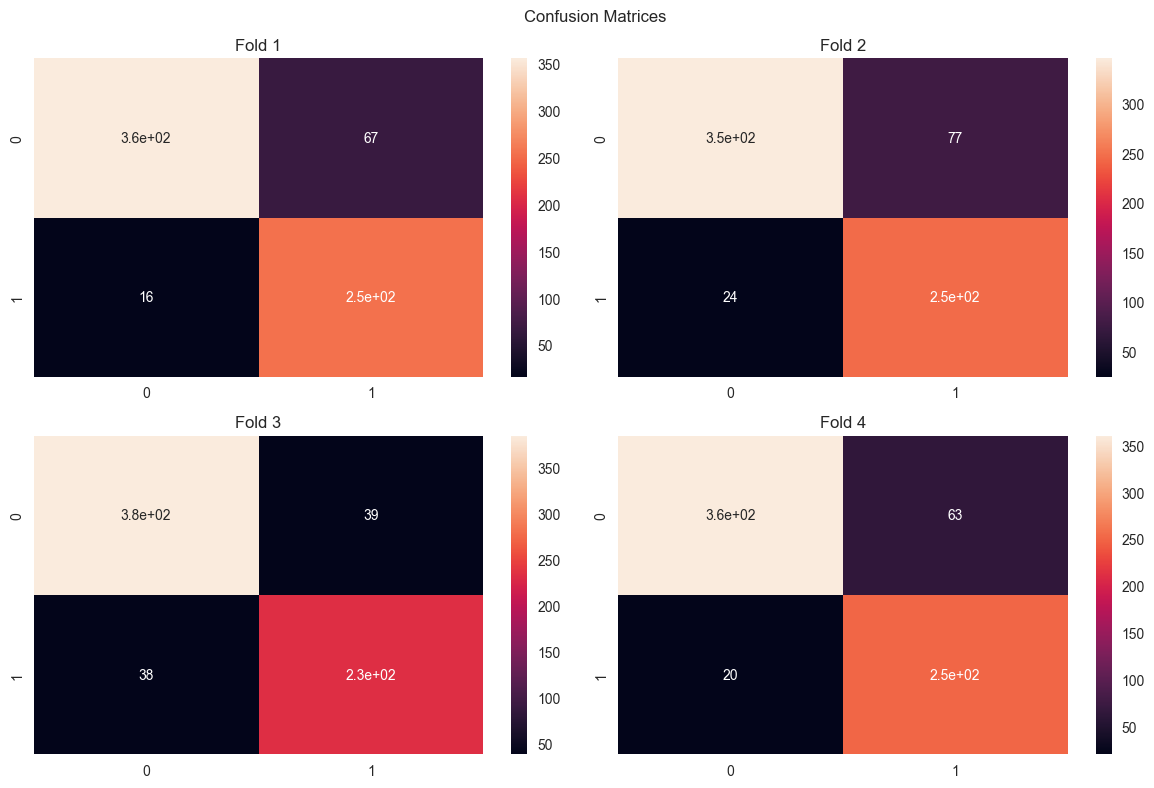

In [136]:
plotter.plot_confusion_matrix(all_models_6, X_test_vectors_6, y_test)

In [137]:
for i, trained_model in enumerate(all_models_6):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_6, y_test))

Model 1:
22/22 [==============================] - 2s 83ms/step
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       423
           1       0.79      0.94      0.86       270

    accuracy                           0.88       693
   macro avg       0.87      0.89      0.88       693
weighted avg       0.89      0.88      0.88       693

Model 2:
22/22 [==============================] - 2s 83ms/step
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       423
           1       0.76      0.91      0.83       270

    accuracy                           0.85       693
   macro avg       0.85      0.86      0.85       693
weighted avg       0.87      0.85      0.86       693

Model 3:
22/22 [==============================] - 2s 86ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       423
           1       0.86      0.86      0.86     

In [138]:
print_testing_loss_accuracy(all_models_6, X_test_vectors_6, y_test)

model: 1
22/22 [==============================] - 2s 85ms/step - loss: 0.5246 - accuracy: 0.8802
model: 2
22/22 [==============================] - 2s 87ms/step - loss: 0.6662 - accuracy: 0.8543
model: 3
22/22 [==============================] - 2s 83ms/step - loss: 0.4370 - accuracy: 0.8889
model: 4
22/22 [==============================] - 2s 83ms/step - loss: 0.4557 - accuracy: 0.8802
average testing loss: 0.521
average testing accuracy: 0.876


### Combination 7: (Processing - anonymization - Imbalancing)

In [139]:
X_train_processed_anonymized = preprocessor.preprocess_data(anonymized_facts_4)

In [140]:
X_test_processed_anonymized = preprocessor.preprocess_data(test_anonymized_facts_4)

In [141]:
glove_tokenizer_7, X_train_vectors_7 = preprocessor.convert_text_to_vectors_glove(X_train_processed_anonymized)

In [142]:
X_test_vectors_7 = preprocessor.convert_text_to_vectors_glove(X_test_processed_anonymized, train=False, glove_tokenizer=glove_tokenizer_7)

In [143]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_7)

In [144]:
all_models_7, all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7 = train_model(build_glove_model, X_train_vectors_7, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 3567s 162ms/step - loss: 0.6821 - accuracy: 0.5782 - val_loss: 0.6759 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 2s 67ms/step - loss: 0.6215 - accuracy: 0.6484 - val_loss: 0.6654 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 2s 74ms/step - loss: 0.5894 - accuracy: 0.6806 - val_loss: 0.6573 - val_accuracy: 0.5824
Epoch 4/30
33/33 [==============================] - 3s 79ms/step - loss: 0.5406 - accuracy: 0.7220 - val_loss: 0.6323 - val_accuracy: 0.6214
Epoch 5/30
33/33 [==============================] - 3s 78ms/step - loss: 0.4996 - accuracy: 0.7451 - val_loss: 0.6503 - val_accuracy: 0.6171
Epoch 6/30
33/33 [==============================] - 3s 78ms/step - loss: 0.4422 - accuracy: 0.7975 - val_loss: 0.6288 - val_accuracy: 0.6517
Epoch 7/30
33/33 [==============================] - 3s 78ms/step - loss: 0.4059 - accuracy: 0.8139 - val_loss: 0.6386 - val_accuracy: 0.6662
E

In [145]:
avg_loss_hist_7, avg_val_loss_hist_7, avg_acc_hist_7, avg_val_acc_hist_7 = calculate_average_measures(all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7)

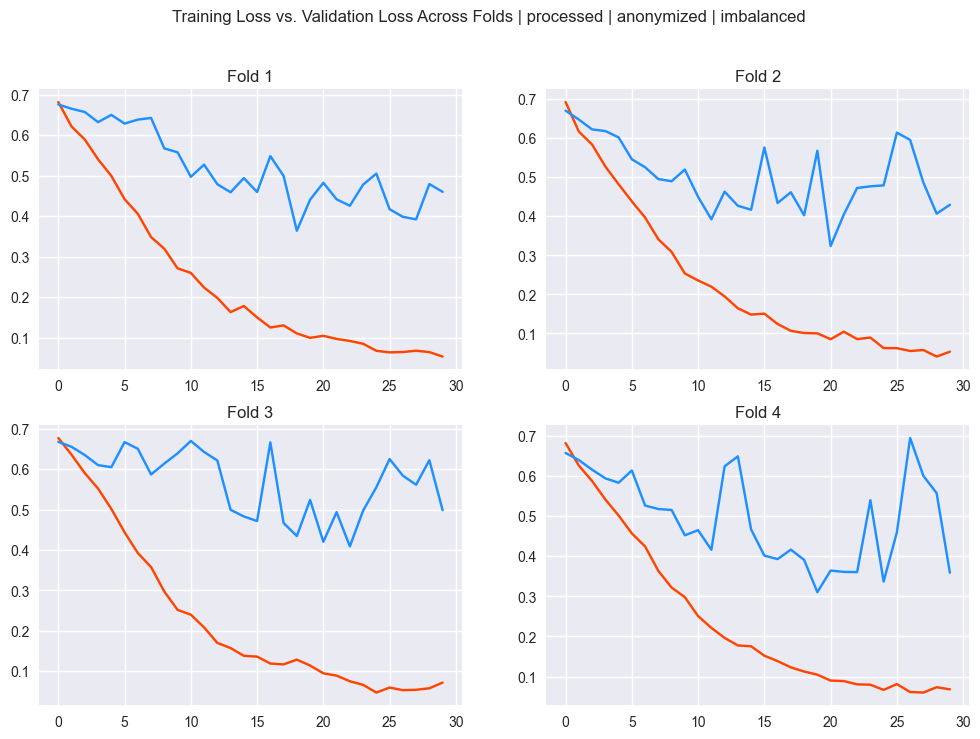

In [146]:
plotter.plot_subplots_curve(all_losses_7, all_val_losses_7, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | imbalanced")

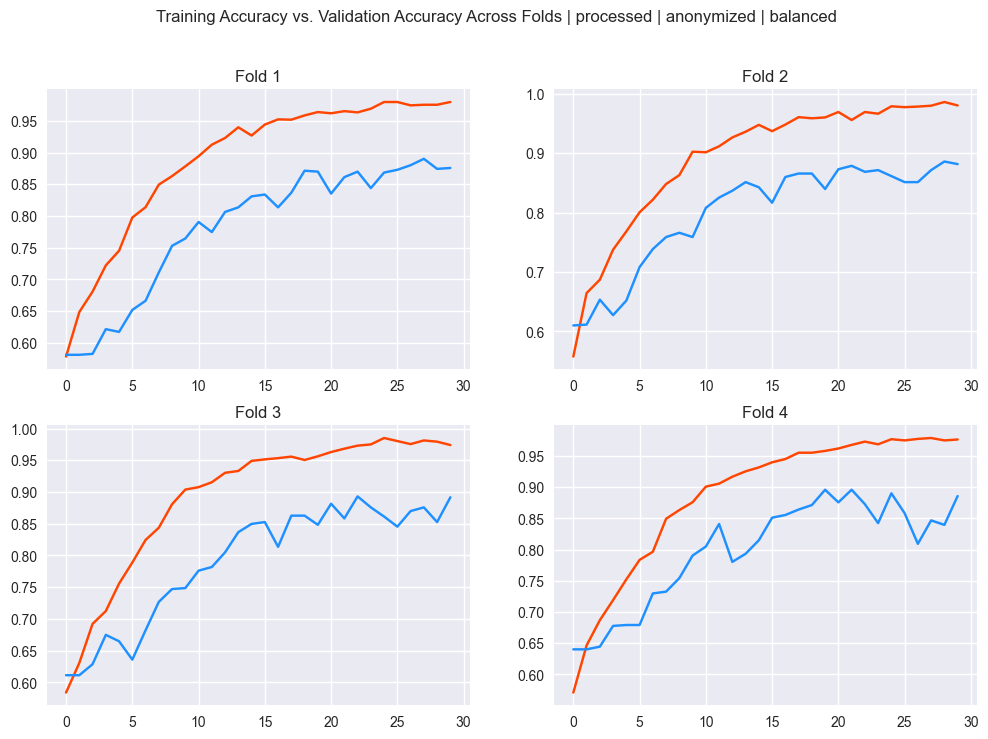

In [147]:
plotter.plot_subplots_curve(all_accuracies_7, all_val_accuracies_7, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | balanced")

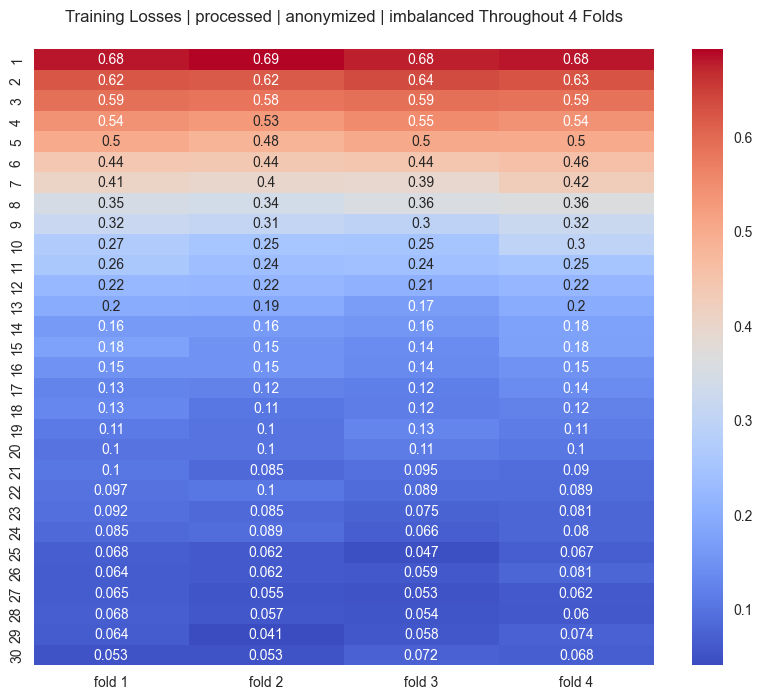

In [148]:
plotter.plot_heatmap(all_losses_7, "Training Losses | processed | anonymized | imbalanced")

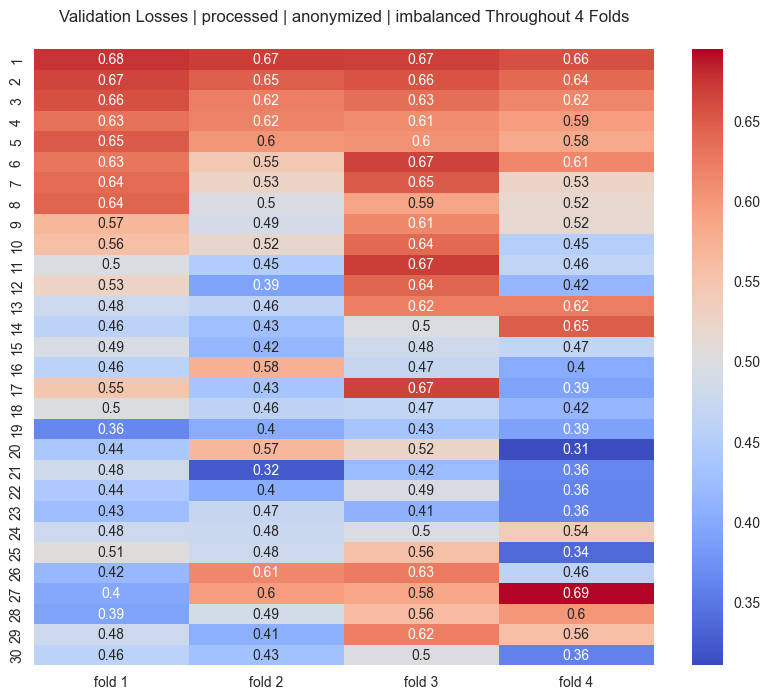

In [149]:
plotter.plot_heatmap(all_val_losses_7, "Validation Losses | processed | anonymized | imbalanced")

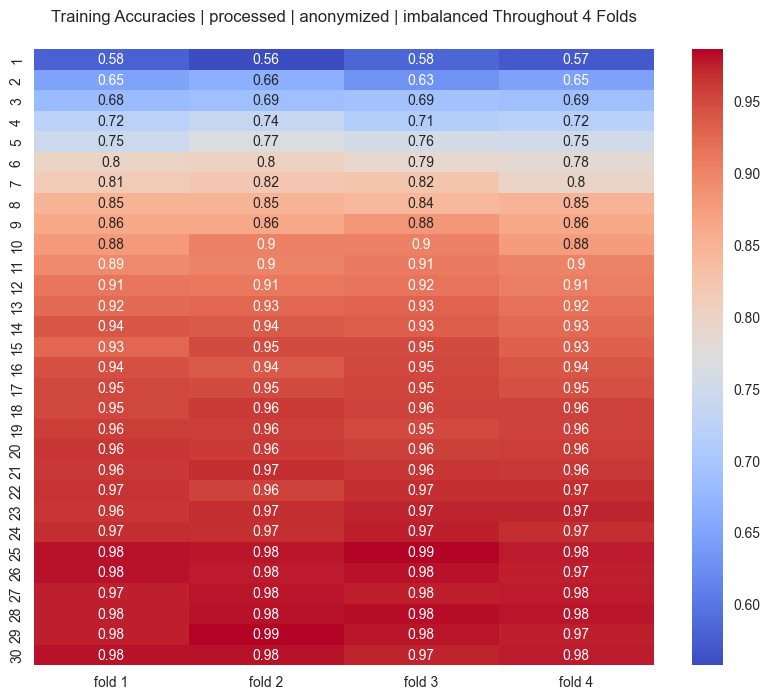

In [150]:
plotter.plot_heatmap(all_accuracies_7, "Training Accuracies | processed | anonymized | imbalanced")

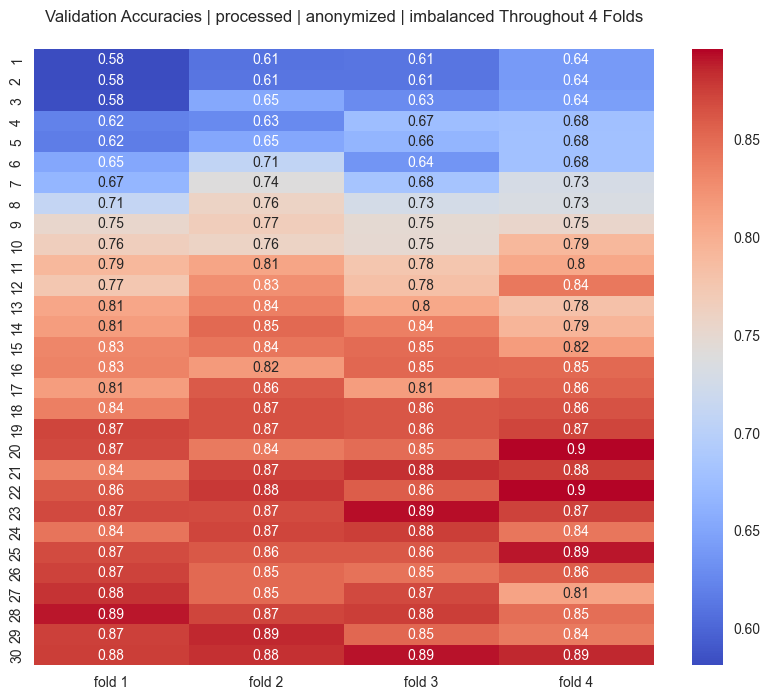

In [151]:
plotter.plot_heatmap(all_val_accuracies_7, "Validation Accuracies | processed | anonymized | imbalanced")

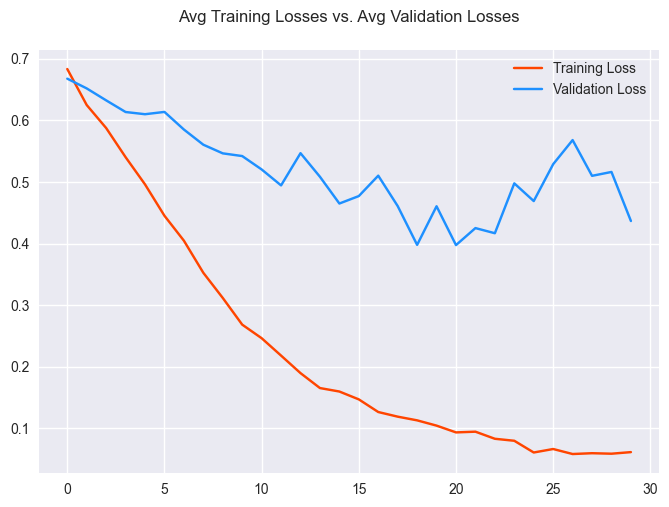

In [152]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_7, avg_val_loss_hist_7, "Training Loss", "Validation Loss")

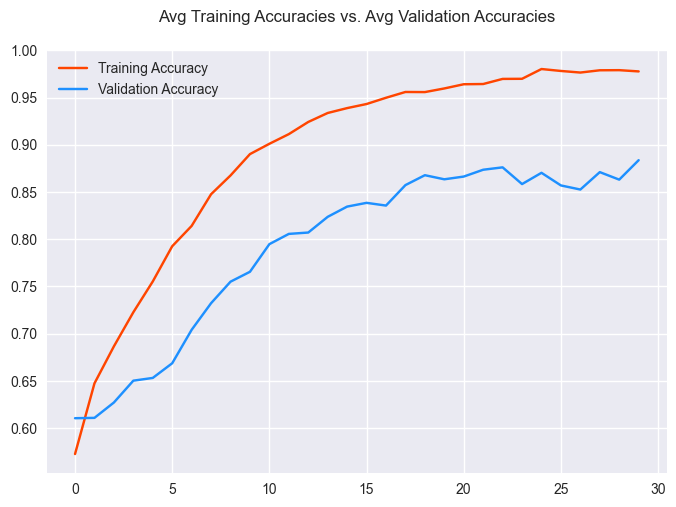

In [153]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_7, avg_val_acc_hist_7, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 4s 21ms/step


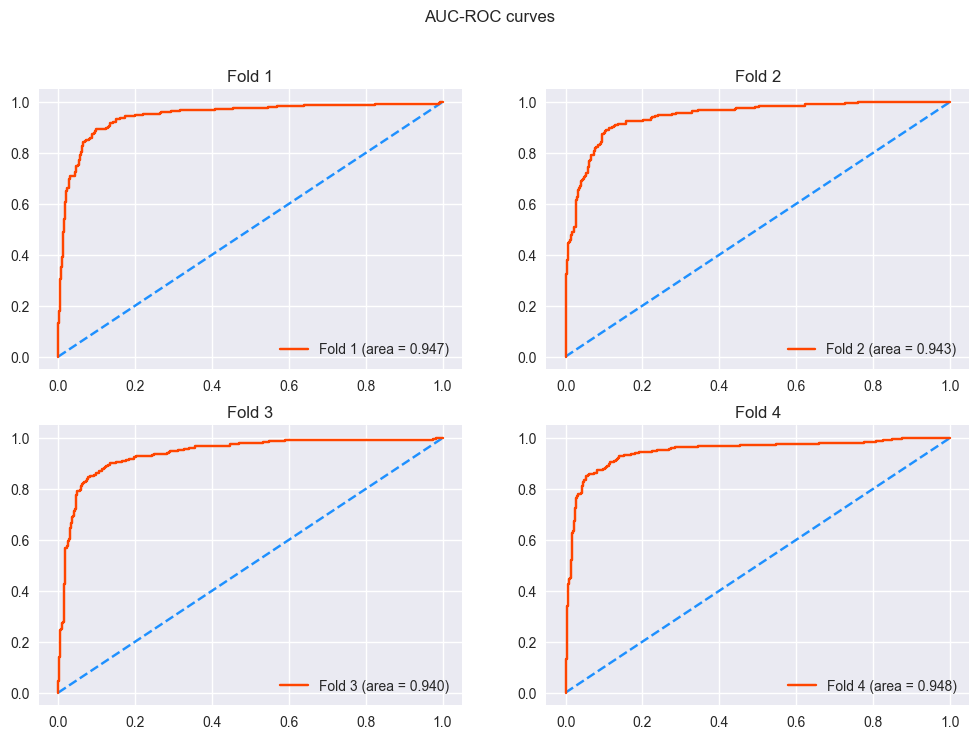

In [154]:
plotter.plot_roc_curve(all_models_7, X_test_vectors_7, y_test)

22/22 [==============================] - 0s 17ms/step


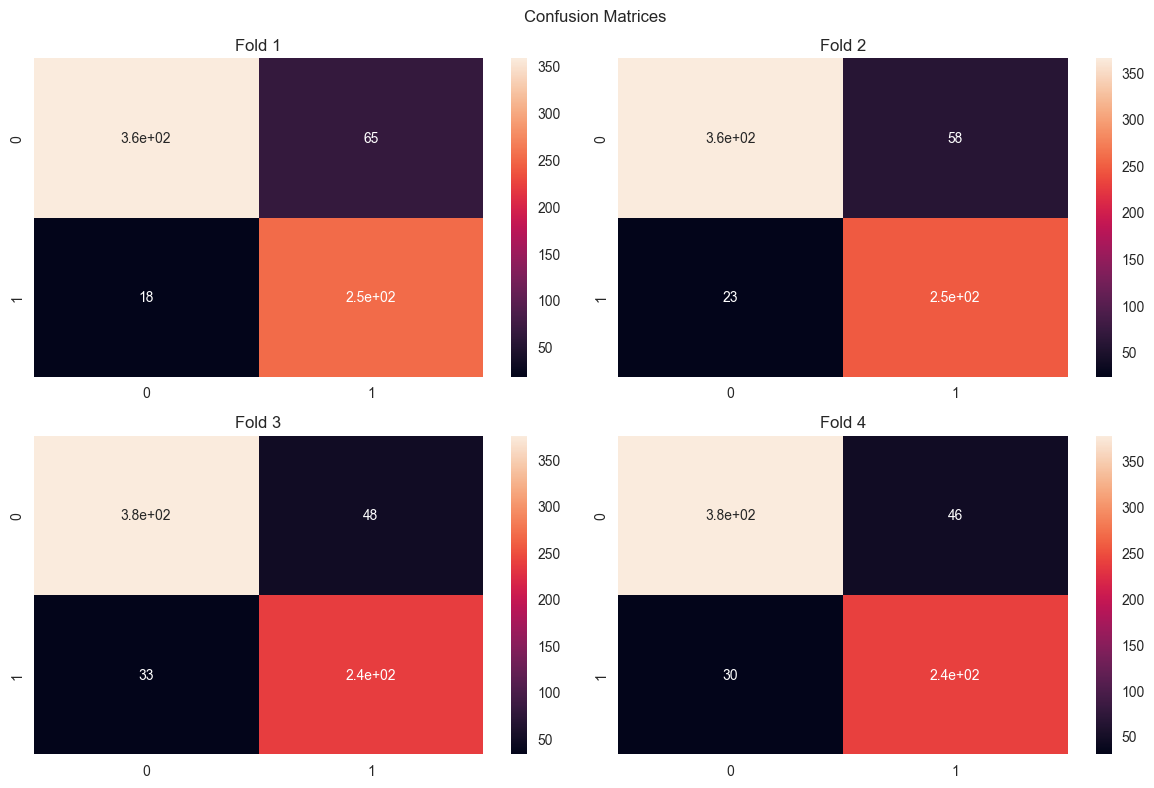

In [155]:
plotter.plot_confusion_matrix(all_models_7, X_test_vectors_7, y_test)

In [156]:
for i, trained_model in enumerate(all_models_7):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_7, y_test))

Model 1:
22/22 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       423
           1       0.79      0.93      0.86       270

    accuracy                           0.88       693
   macro avg       0.87      0.89      0.88       693
weighted avg       0.89      0.88      0.88       693

Model 2:
22/22 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       423
           1       0.81      0.91      0.86       270

    accuracy                           0.88       693
   macro avg       0.88      0.89      0.88       693
weighted avg       0.89      0.88      0.88       693

Model 3:
22/22 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       423
           1       0.83      0.88      0.85     

In [157]:
print_testing_loss_accuracy(all_models_7, X_test_vectors_7, y_test)

model: 1
22/22 [==============================] - 0s 21ms/step - loss: 0.4625 - accuracy: 0.8802
model: 2
22/22 [==============================] - 0s 19ms/step - loss: 0.4623 - accuracy: 0.8831
model: 3
22/22 [==============================] - 0s 18ms/step - loss: 0.4604 - accuracy: 0.8831
model: 4
22/22 [==============================] - 0s 18ms/step - loss: 0.3814 - accuracy: 0.8903
average testing loss: 0.442
average testing accuracy: 0.884


### Combination 8: (Processing - anonymization - Balancing)

In [158]:
processed_anonymized_balanced_df = preprocessor.balance_data(X_train_processed_anonymized, y_train)
processed_anonymized_balanced_df = processed_anonymized_balanced_df.rename(columns={0: "Facts"})
processed_anonymized_balanced_df.head()

Facts  winner_index
1183  _party_ boy identifi _party_ _party_ _party_ y...             0
853   _party_ prison break car nubia blandon told na...             1
2663  kathi _party_ _party_ su _party_ _party_ _part...             0
1076  _party_ tgpl propos plan ga alloc among custom...             0
1277  _party_ cfpb investig _party_ law firm provid ...             1

In [159]:
X_train_processed_anonymized_balanced = processed_anonymized_balanced_df["Facts"]
y_train_processed_anonymized_balanced = processed_anonymized_balanced_df["winner_index"]

In [160]:
glove_tokenizer_8, X_train_vectors_8 = preprocessor.convert_text_to_vectors_glove(X_train_processed_anonymized_balanced)

In [161]:
X_test_vectors_8 = preprocessor.convert_text_to_vectors_glove(X_test_processed_anonymized, train=False, glove_tokenizer=glove_tokenizer_8)

In [162]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_8)

In [163]:
all_models_8, all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8 = train_model(build_glove_model, X_train_vectors_8, y_train_processed_anonymized_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 35s 175ms/step - loss: 0.6726 - accuracy: 0.5743 - val_loss: 0.6841 - val_accuracy: 0.5609
Epoch 2/30
40/40 [==============================] - 4s 95ms/step - loss: 0.6171 - accuracy: 0.6559 - val_loss: 0.6632 - val_accuracy: 0.6296
Epoch 3/30
40/40 [==============================] - 4s 96ms/step - loss: 0.5514 - accuracy: 0.7233 - val_loss: 0.6240 - val_accuracy: 0.6710
Epoch 4/30
40/40 [==============================] - 4s 89ms/step - loss: 0.4785 - accuracy: 0.7702 - val_loss: 0.5863 - val_accuracy: 0.6769
Epoch 5/30
40/40 [==============================] - 3s 86ms/step - loss: 0.3905 - accuracy: 0.8289 - val_loss: 0.5847 - val_accuracy: 0.6840
Epoch 6/30
40/40 [==============================] - 4s 99ms/step - loss: 0.3386 - accuracy: 0.8565 - val_loss: 0.6124 - val_accuracy: 0.7018
Epoch 7/30
40/40 [==============================] - 4s 94ms/step - loss: 0.2743 - accuracy: 0.8908 - val_loss: 0.7234 - val_accuracy: 0.6722
Epo

In [164]:
avg_loss_hist_8, avg_val_loss_hist_8, avg_acc_hist_8, avg_val_acc_hist_8 = calculate_average_measures(all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8)

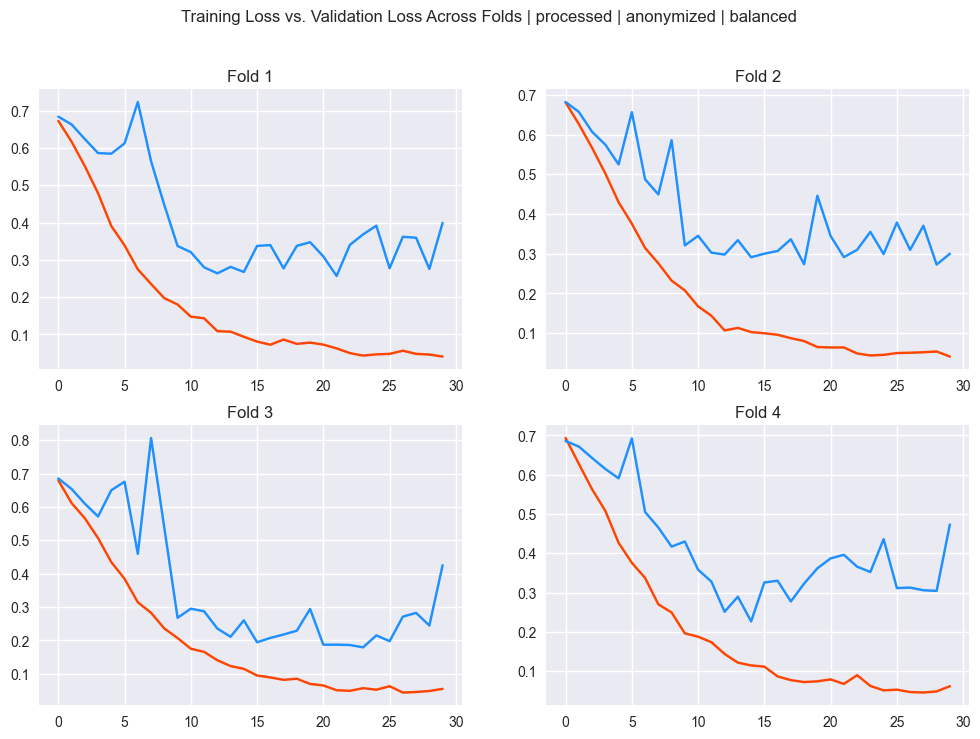

In [165]:
plotter.plot_subplots_curve(all_losses_8, all_val_losses_8, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | balanced")

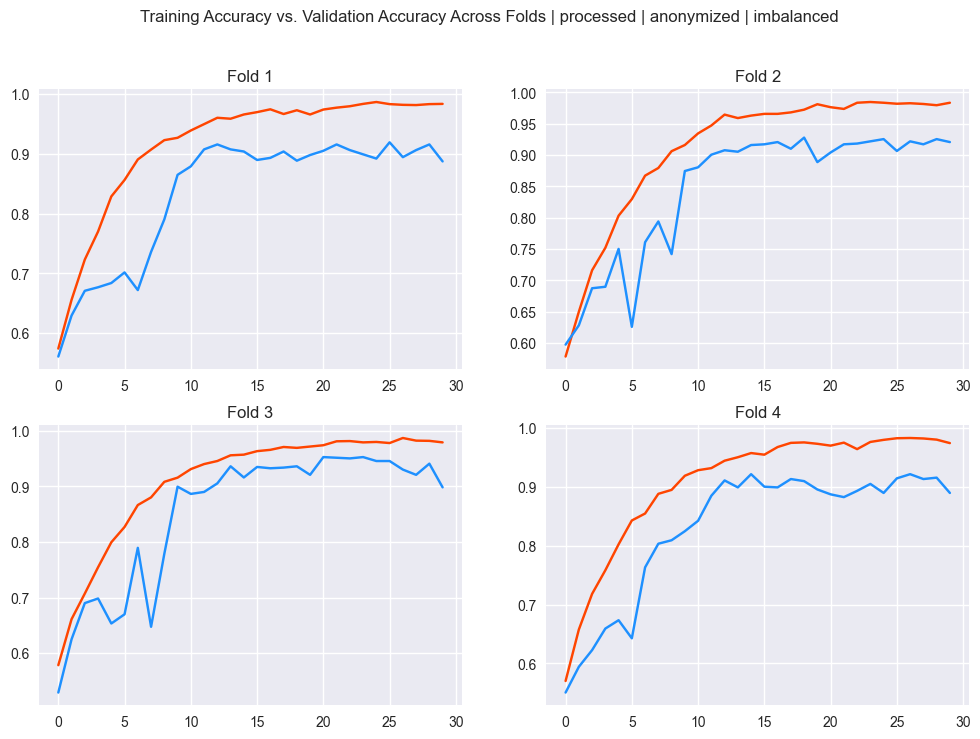

In [166]:
plotter.plot_subplots_curve(all_accuracies_8, all_val_accuracies_8, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | imbalanced")

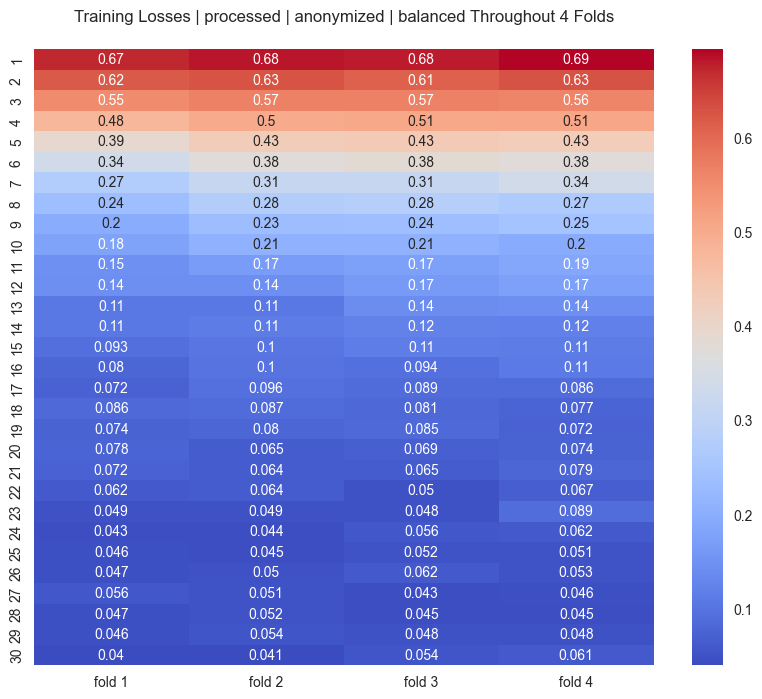

In [167]:
plotter.plot_heatmap(all_losses_8, "Training Losses | processed | anonymized | balanced")

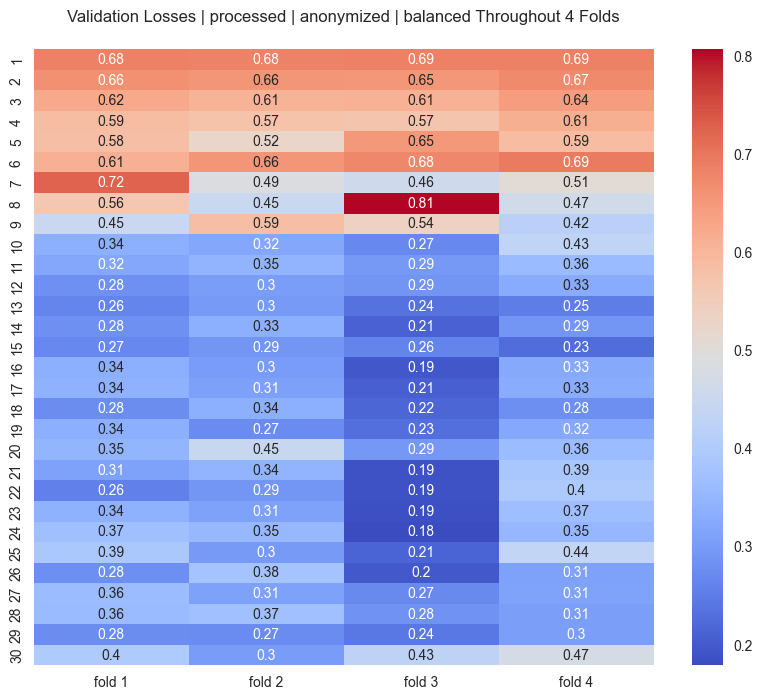

In [168]:
plotter.plot_heatmap(all_val_losses_8, "Validation Losses | processed | anonymized | balanced")

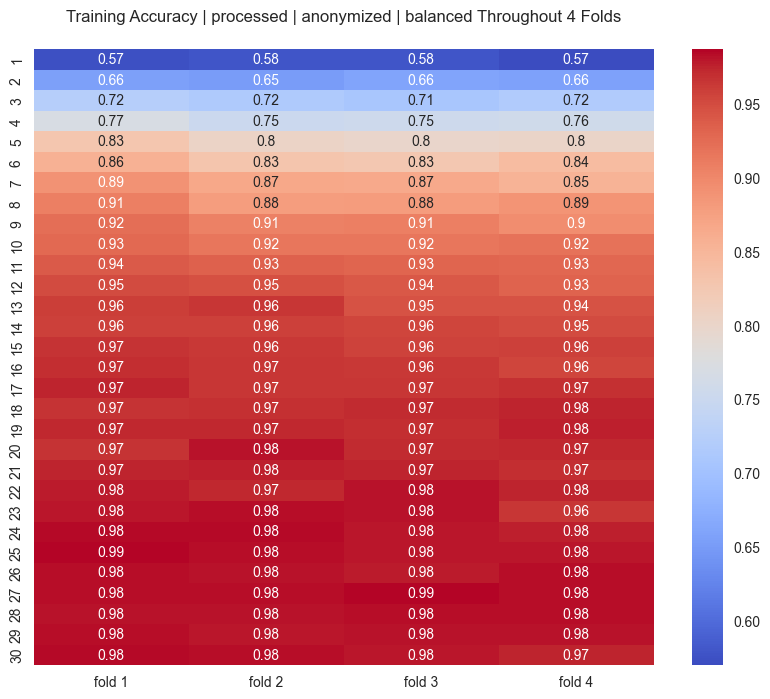

In [169]:
plotter.plot_heatmap(all_accuracies_8, "Training Accuracy | processed | anonymized | balanced")

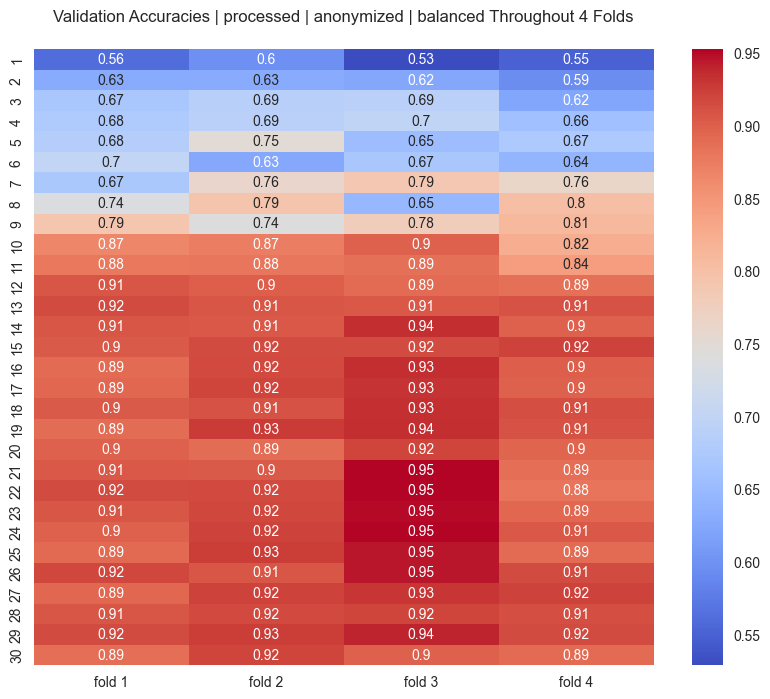

In [170]:
plotter.plot_heatmap(all_val_accuracies_8, "Validation Accuracies | processed | anonymized | balanced")

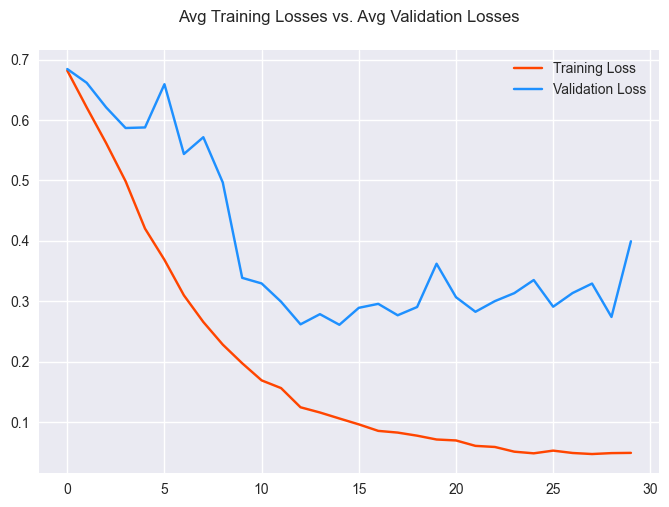

In [171]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_8, avg_val_loss_hist_8, "Training Loss", "Validation Loss")

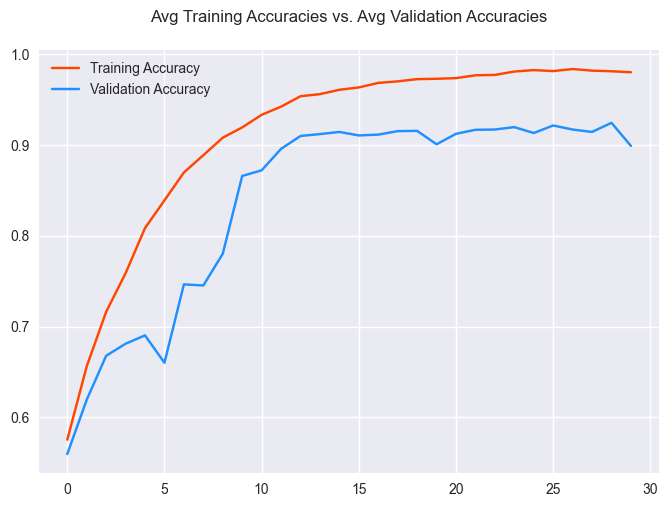

In [172]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_8, avg_val_acc_hist_8, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 4s 19ms/step


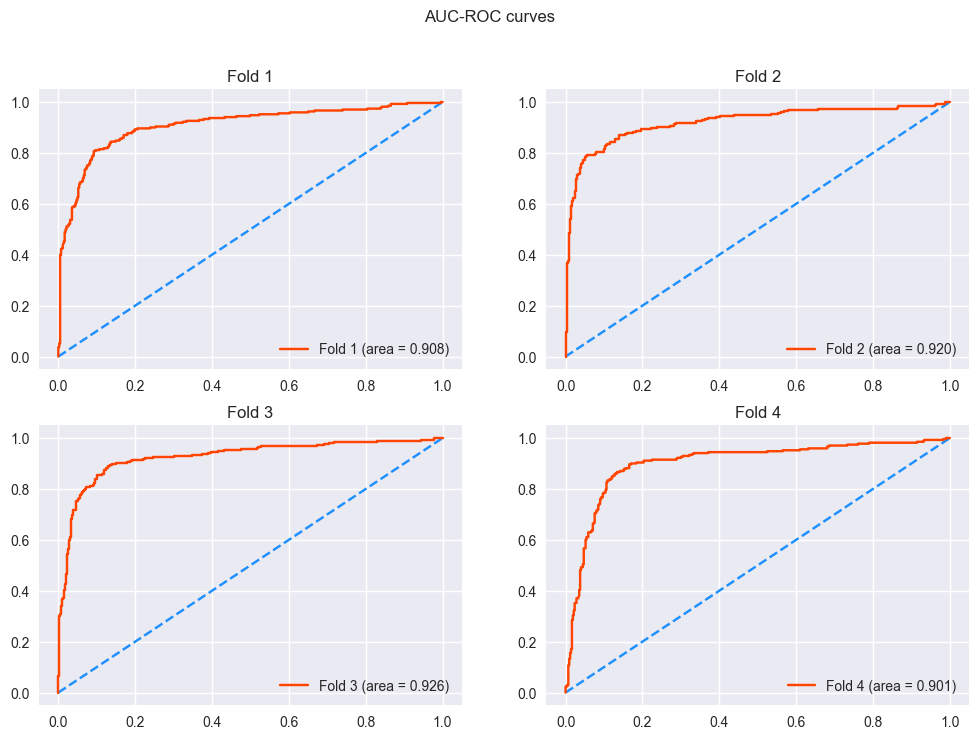

In [173]:
plotter.plot_roc_curve(all_models_8, X_test_vectors_8, y_test)

22/22 [==============================] - 0s 21ms/step


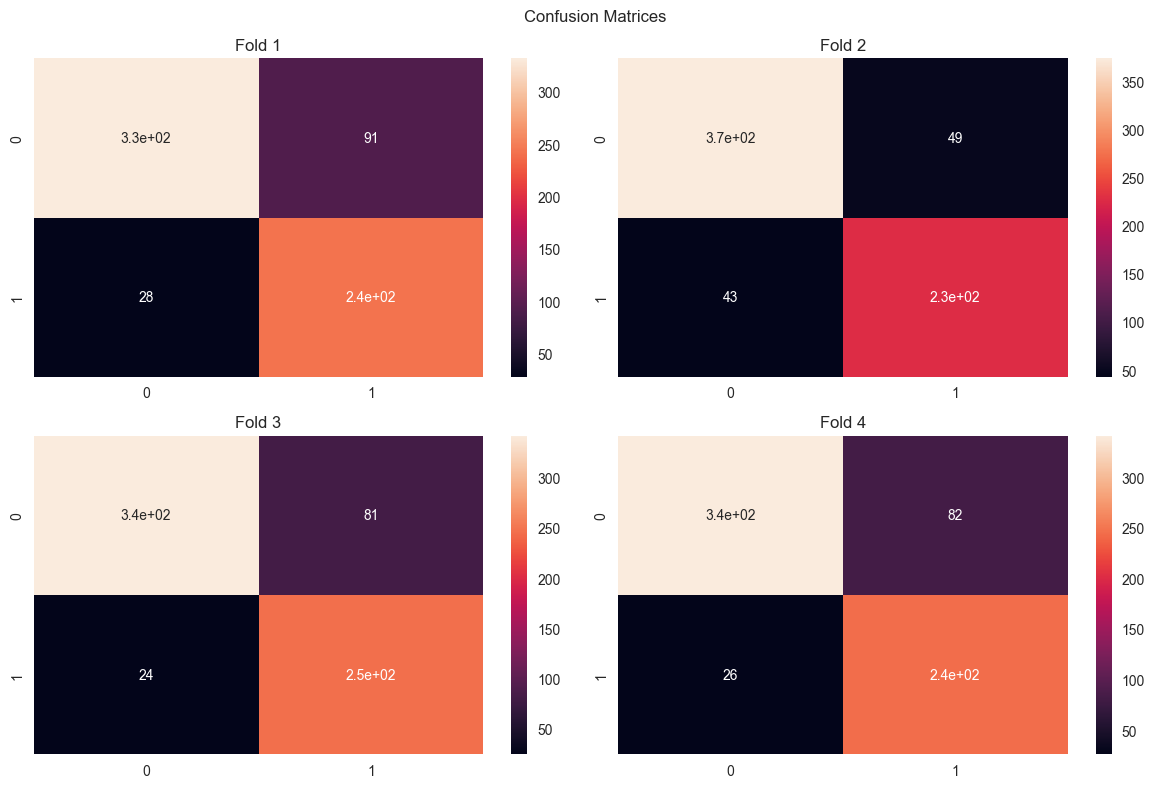

In [174]:
plotter.plot_confusion_matrix(all_models_8, X_test_vectors_8, y_test)

In [175]:
for i, trained_model in enumerate(all_models_8):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_8, y_test))

Model 1:
22/22 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       423
           1       0.73      0.90      0.80       270

    accuracy                           0.83       693
   macro avg       0.82      0.84      0.83       693
weighted avg       0.85      0.83      0.83       693

Model 2:
22/22 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       423
           1       0.82      0.84      0.83       270

    accuracy                           0.87       693
   macro avg       0.86      0.86      0.86       693
weighted avg       0.87      0.87      0.87       693

Model 3:
22/22 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       423
           1       0.75      0.91      0.82     

In [176]:
print_testing_loss_accuracy(all_models_8, X_test_vectors_8, y_test)

model: 1
22/22 [==============================] - 0s 21ms/step - loss: 0.7324 - accuracy: 0.8283
model: 2
22/22 [==============================] - 0s 20ms/step - loss: 0.5693 - accuracy: 0.8672
model: 3
22/22 [==============================] - 0s 19ms/step - loss: 0.6683 - accuracy: 0.8485
model: 4
22/22 [==============================] - 0s 21ms/step - loss: 0.7297 - accuracy: 0.8442
average testing loss: 0.675
average testing accuracy: 0.847


### Saving Best Combination
The best combination is: combination 2 (no preprocessing - no anonymization - balanced), As a final result, the best model generalizing well on testing data with the highest testing accuracy is **the first model of the second combination** with **0.916** testing accuracy and **0.384** testing loss.

In [178]:
all_models_2[0].save("models/best_glove_model.h5")